In [1]:
import numpy as np
import GEOparse as gp
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display

We download the data from the GSE dataset

In [2]:
gse = gp.get_GEO(geo="GSE157239", destdir="./")

12-Nov-2020 00:40:00 DEBUG utils - Directory ./ already exists. Skipping.
12-Nov-2020 00:40:00 INFO GEOparse - File already exist: using local version.
12-Nov-2020 00:40:00 INFO GEOparse - Parsing ./GSE157239_family.soft.gz: 
12-Nov-2020 00:40:00 DEBUG GEOparse - DATABASE: GeoMiame
12-Nov-2020 00:40:00 DEBUG GEOparse - SERIES: GSE157239
12-Nov-2020 00:40:00 DEBUG GEOparse - PLATFORM: GPL21572
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/GEOparse/GEOparse.py:110: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  return parse_GSE(filepath, open_kwargs=open_kwargs)
12-Nov-2020 00:40:16 DEBUG GEOparse - SAMPLE: GSM4759790
12-Nov-2020 00:40:16 DEBUG GEOparse - SAMPLE: GSM4759791
12-Nov-2020 00:40:16 DEBUG GEOparse - SAMPLE: GSM4759792
12-Nov-2020 00:40:16 DEBUG GEOparse - SAMPLE: GSM4759793
12-Nov-2020 00:40:17 DEBUG GEOparse - SAMPLE: GSM4759794
12-Nov-2020 00:40:17 DEBUG GEOparse - SAMPLE: GSM4759795
12-No

In [25]:
# Significance level
alpha = 0.01

# Identifying which samples are controls
control_columns = np.array([0, 1, 2, 4, 6, 9, 11, 15])
c = np.zeros(16, dtype=bool)
c[control_columns] = 1

# Creating accessible matrices from the dataset
values = []
for k, v in gse.gsms.items():
    ids = v.table["ID_REF"].to_numpy()
    values.append(v.table['VALUE'].to_numpy())
values = np.stack(values, axis=-1)

mask = np.broadcast_to(c, (len(values), 16))

controls = values[mask].reshape(-1, 8)
samples = values[~mask].reshape(-1, 8)

# Running one-way ANOVA analysis on the RNAs
f_stats = stats.f_oneway(controls, samples, axis=-1)
num_significant = np.sum(f_stats.pvalue < alpha)
signif_ids = ids[f_stats.pvalue < alpha]

# Sorting by p-value
ids = np.array(ids)
order = np.argsort(f_stats.pvalue)
sorted_ids = ids[order]

[10.4745 11.6909 10.5571 11.1498 10.6749 11.168  10.7571 11.1822 10.5113
 11.4501 10.9076 11.5447 10.1557 11.2126 11.3074 11.0955]
[1.20388 1.16177 1.27211 1.20322 1.118   1.25961 1.34818 1.28502 1.25622
 1.32478 1.24178 1.32888 1.21867 1.4027  1.19076 1.4245 ]
[1.21191 1.50732 1.37205 1.55835 1.16507 1.57233 1.8042  1.18273 1.38562
 1.27287 1.26939 1.17613 1.14477 1.23312 2.0174  1.33175]
[13.3608 13.4955 13.0875 13.4126 12.9592 13.4591 13.2947 13.3289 13.193
 13.3868 13.2583 13.5269 12.762  13.4692 13.6274 13.1905]
[1.78962 1.24097 1.22441 1.23105 1.17426 1.12983 1.63181 1.12137 1.29113
 1.11329 1.11886 1.25474 1.26891 1.28268 1.29931 1.23433]
[12.2704 12.6945 12.0881 12.4618 12.0974 12.451  12.3003 12.3872 12.0524
 12.4967 12.342  12.7336 11.8285 12.3939 12.6688 12.3517]
[0.974291 0.882401 1.18683  1.11748  0.924041 0.953148 0.840372 0.943265
 0.964523 0.94788  1.02749  0.968089 0.970254 0.966043 1.14641  0.961923]
[11.2534 11.2743 11.0322 11.2605 10.9423 11.1165 10.8611 11.2413 10.

[0.650732 0.715293 0.566301 0.749059 0.615596 0.654281 0.694951 0.997135
 0.654099 0.623186 0.689027 0.636894 0.612387 0.674674 0.701849 0.695071]
[1.43871 1.49379 1.51846 1.89079 1.48935 1.6023  1.64183 1.49017 1.84902
 1.61713 1.38438 2.15084 1.64928 1.57062 1.59444 1.52501]
[7.7578  6.34464 6.61796 7.05493 6.87276 6.92107 6.91399 7.52874 6.89753
 6.8748  6.85195 6.59003 7.18628 6.15338 7.4389  7.08172]
[1.0283   1.25659  0.977767 1.15402  1.0851   1.10172  1.27864  1.00712
 1.58109  1.10512  1.00805  1.20774  1.0892   1.08711  1.07258  0.977865]
[1.56547 1.68717 1.56232 1.6299  1.78367 1.38871 1.71868 1.45468 1.57195
 1.45491 1.63655 1.61779 1.94504 1.45491 1.53639 1.69762]
[2.6982  1.66662 3.98271 3.5284  2.46136 4.10366 1.95952 3.32642 3.45155
 4.21506 1.20029 1.33699 4.48647 1.50042 1.60634 4.48984]
[7.89468 4.79218 7.89289 8.07841 7.42275 7.10911 6.5633  7.56612 7.91436
 7.28212 5.01733 5.50368 7.65903 4.80439 7.34236 7.53931]
[3.2522  4.23991 4.32572 5.08579 3.73834 5.00845 5.1

 0.771084 0.689233 0.916875 0.735152 0.648027 0.993664 0.79265  0.693035]
[1.43536  1.51125  0.840064 0.826588 0.841086 1.47857  0.78034  0.637813
 0.756593 1.23012  0.66114  0.721163 0.958452 0.928612 0.775121 1.12412 ]
[ 9.10041 10.1461   8.75303  9.15776  8.85174  9.12624  8.4918   9.06399
  9.00875  9.3465   9.04827  9.03383  8.91744  8.98943  9.32142  9.05998]
[0.932103 0.827304 0.991068 1.08278  1.18823  0.990226 1.0644   1.07363
 0.981111 1.15735  0.859906 0.902001 0.771502 1.04972  0.941859 0.928139]
[0.991583 1.11498  1.04133  1.02722  0.901082 1.23632  0.911657 0.971819
 0.909015 0.960315 1.15675  0.985432 1.12412  1.0734   0.987973 0.936057]
[ 9.6102  10.6372   9.61528  9.83168  9.11927  9.59242  9.06351  9.03289
  9.35655  9.61835  9.78643  9.66541  9.20861  9.54326 10.2009   9.05729]
[1.00228  0.875913 0.875614 1.30594  0.931027 0.877198 0.875913 1.02388
 1.10423  0.912678 0.828185 0.832605 0.882657 0.972972 0.865267 1.00328 ]
[1.24252  0.965028 0.827911 0.896001 0.813322 

[1.99204 2.19941 2.67101 2.52518 3.51805 2.19019 3.22    2.3471  1.83149
 4.1027  1.68941 4.54506 1.81655 3.03383 2.48726 2.29686]
[1.22608  0.879987 0.876882 1.01106  1.65066  1.13481  0.840019 1.39896
 0.930231 1.0615   0.928718 0.992144 0.869231 0.925181 0.900633 0.888331]
[10.331   10.3105  10.4201  10.504    9.92353 10.0409  10.0427  10.5584
 10.0513  10.6711  10.1986  10.5309  10.1407   9.95998 11.2385  10.5312 ]
[1.50007 1.29847 2.27797 2.11825 2.12007 1.82781 2.06189 3.3006  1.88063
 1.84114 1.45337 1.85611 1.52415 1.34743 1.61542 1.69362]
[5.97271 4.9094  5.48116 5.07379 5.4779  4.82218 5.17527 5.15547 5.32347
 5.72148 4.51205 6.20104 5.62002 5.4514  5.92809 5.45761]
[1.20282  1.05057  0.917137 1.02875  1.00229  0.997917 1.15006  1.01412
 1.01268  1.10742  0.949953 0.934064 1.11264  0.90268  1.08302  1.06385 ]
[1.43492 1.1044  1.20723 1.15375 1.19009 1.18546 1.1243  1.1155  1.1848
 1.2029  1.02116 1.32775 1.25375 1.34279 1.4126  1.34093]
[3.04312 4.57622 2.6176  3.68413 3.7667

 0.792623 0.751781 0.815391 0.860992 0.991434 0.913535 0.864615 0.78177 ]
[0.961291 0.878245 1.0206   0.913767 1.06815  0.93494  0.96529  0.920079
 0.970073 0.919423 0.960877 0.913606 1.02316  0.965527 0.971591 1.12612 ]
[1.51322 1.49515 1.65745 1.70224 1.42452 1.63726 1.46457 1.3661  1.64949
 1.46607 1.98184 1.44383 1.47084 1.61801 1.71573 1.57302]
[3.82851 4.41978 4.06651 4.04583 4.2997  4.40818 4.02051 3.99669 4.6568
 4.11974 3.28188 4.5111  3.51716 3.97516 3.37851 4.1915 ]
[7.85686 7.41386 7.54474 7.66398 7.30785 7.17714 7.19917 7.11433 7.30401
 7.20723 7.34906 7.55532 7.02298 7.13265 8.23361 7.11467]
[8.77607 7.92626 8.41003 8.3792  8.10464 7.62167 7.54007 8.13919 7.89212
 8.32448 6.82521 8.39669 7.76544 7.69652 9.21261 7.84717]
[0.738549 0.696066 0.743954 0.72507  0.983042 0.825392 0.769557 0.787711
 0.716988 0.788483 0.776541 0.799048 0.829235 0.770799 0.721878 0.86833 ]
[1.5448  2.10031 3.17935 3.34816 1.5397  1.23632 2.61105 2.06457 2.27604
 4.28641 1.2145  4.21913 3.23476 2.3

 1.23226 2.36374 1.86212 1.37056 1.34636 1.41045 1.50717]
[ 9.79237  9.13641  9.941    9.97304  9.3147   9.32054  9.30991 10.0127
  9.42053  9.80408  9.42808  9.22474  9.73386  8.87262 10.6467  10.1305 ]
[2.11941  1.12412  1.61528  1.17478  1.06451  0.994996 1.14808  1.21162
 1.27982  1.66265  1.02116  1.40179  1.52415  1.0437   1.38637  1.65499 ]
[1.57846 1.21874 1.33461 1.21766 1.36284 1.27641 1.30355 1.25381 1.20958
 1.2725  1.15667 1.25514 1.38347 1.27641 1.35426 1.3528 ]
[6.97695 6.71599 7.42834 7.32479 7.42625 6.97535 6.8548  7.22399 6.89228
 7.61061 7.66245 7.10847 7.40328 6.56082 7.65258 6.86094]
[0.884897 0.876318 0.856084 0.797833 0.914478 1.04112  0.977494 0.995191
 0.921614 0.918681 0.834761 0.884822 1.12412  0.874    0.905918 0.919133]
[4.97732 4.76965 5.6927  5.89996 5.75682 5.59938 5.01921 6.60046 6.07871
 6.78461 5.4019  6.02567 5.57282 5.17775 5.78565 6.32388]
[1.28677 1.53241 1.29361 1.41761 1.25998 1.29225 1.69069 1.2768  1.14866
 1.14305 1.46457 1.39709 1.29638 1.21

 1.40387 1.31497 1.70608 1.39922 1.43022 1.32369 1.28908]
[1.45787  1.03153  1.17913  1.07995  0.95926  1.08237  0.990977 1.19852
 1.09966  1.09759  0.990977 1.03297  1.05169  1.0208   1.02772  1.12412 ]
[1.36206 1.21173 1.50445 1.47431 1.35227 1.27618 1.39544 1.27618 1.28506
 1.594   1.189   1.27002 1.58301 1.11838 1.28231 1.12227]
[0.988369 1.07668  1.18191  1.08737  1.07721  1.10548  1.06178  1.10548
 0.954107 1.09378  0.991158 1.08057  1.05109  1.31006  1.05935  1.06923 ]
[1.22669  1.46457  1.3344   1.0186   0.971591 1.01112  1.02021  1.12145
 1.05287  1.27312  1.09528  1.05844  1.23546  1.08623  1.2473   1.18888 ]
[0.87962  1.06543  0.818132 0.915854 1.0893   0.87962  1.00112  0.795882
 0.833762 0.841958 0.827902 0.806425 0.961663 0.956826 0.884552 0.775523]
[1.08987 1.39983 1.01294 1.2067  1.12381 1.09839 1.20807 1.08453 1.22195
 1.22802 1.11972 1.48428 1.02161 1.10088 1.06811 1.0155 ]
[1.08816 1.47462 1.80799 1.26583 1.34118 1.38378 1.36514 1.21697 1.40271
 1.16157 1.35445 1.127

 5.64831 4.96808 5.84258 5.48906 5.47606 6.33194 5.12658]
[4.94935 5.53684 4.59915 4.41352 5.35604 5.29489 5.25602 5.18492 5.14078
 5.66754 5.88578 5.30815 6.05379 5.37992 5.21047 5.79657]
[1.23682 1.35427 5.03602 1.45055 4.3828  2.0758  2.32825 3.06045 3.91583
 3.63602 1.49732 2.40189 1.21532 1.08264 1.9666  3.48203]
[5.71814 4.58177 5.87961 5.42457 5.21493 4.70358 4.6513  5.57756 5.28234
 5.30874 4.90809 4.94194 5.34964 3.46615 6.06973 5.10549]
[4.36096 4.86796 6.01077 6.1797  5.74529 4.6862  4.96052 6.67739 5.54723
 5.99348 1.6341  5.86628 5.90281 4.50622 5.92988 6.12313]
[1.10107 1.34149 1.13275 1.11084 1.00787 1.24369 1.0228  1.63548 1.24323
 1.10016 1.20332 1.61662 1.12081 1.22552 1.79452 1.41185]
[1.09311  0.864741 0.921132 0.911032 1.1516   0.863384 1.03879  0.946909
 1.15671  0.904776 1.00439  0.918447 1.01288  1.03859  0.961937 0.922055]
[6.23237 5.71063 6.38722 6.58315 4.92689 5.40168 5.34322 6.34134 6.01446
 5.63557 4.84454 6.01577 5.77446 4.61187 6.99782 6.17107]
[1.24509 

 0.817712 0.922008 0.802521 0.822773 1.16475  0.829698 1.0761   1.27297 ]
[3.83324 3.56762 3.43638 2.50161 2.60901 3.20967 3.59036 3.61751 3.49944
 3.77166 2.86303 4.32525 3.67982 2.06852 2.43427 3.99277]
[0.908673 0.836532 1.44699  0.986836 0.846757 0.842131 0.833846 0.854205
 0.76978  0.827657 1.02711  0.953604 0.89771  0.837873 0.846757 1.04669 ]
[2.65695 2.81581 3.52221 5.48887 2.63316 2.63927 2.06326 4.25004 6.51344
 3.31572 2.27873 2.44544 4.51405 2.92498 5.28422 4.02463]
[1.56597 1.44337 1.62039 1.14393 1.05158 1.1241  1.37473 1.08703 1.2909
 1.06936 1.12713 1.13024 1.71923 1.00277 1.17653 1.52402]
[1.84738 4.44461 3.07955 1.83962 3.11404 4.62334 2.25098 3.94813 5.38438
 1.96395 3.94438 2.00056 5.40223 1.84894 2.45367 5.08179]
[0.571504 0.600742 0.737861 0.567138 0.573937 0.520288 0.561268 0.481684
 0.584756 0.475076 0.625867 0.654774 0.565052 0.616877 0.504765 0.647891]
[1.49512 1.14532 1.22982 1.2282  1.1811  1.13284 1.14396 1.18325 1.1838
 1.30527 1.24854 1.24447 1.14333 1.32

 0.954429 1.04012  1.72417  0.944117 1.01098  1.30961  1.09725  0.983273]
[0.739655 0.731985 0.799477 0.820953 0.844216 0.827902 0.827902 0.826588
 0.76175  0.794063 0.855918 0.807858 0.87045  0.89554  0.870496 0.800665]
[5.57824 5.78645 5.47166 5.9773  5.34787 5.8513  5.79622 5.73422 5.7673
 6.36685 6.26709 6.03495 5.79106 5.52655 6.18015 5.79618]
[0.988188 0.756788 0.798175 0.830478 0.78751  0.826929 0.706155 0.763951
 0.786012 0.789957 1.56478  0.81981  0.808281 0.984425 0.830478 1.03234 ]
[1.23632 1.06934 1.601   1.22533 1.16509 1.22823 1.14846 1.07208 1.01838
 1.12726 1.20563 1.30694 1.20437 1.42508 1.05178 1.17605]
[0.990562 1.17548  1.53738  1.67552  1.13409  1.44767  1.8128   1.46506
 1.31731  1.19413  1.3043   1.42315  1.23546  1.35739  1.23546  1.36089 ]
[1.3469  1.67756 1.77381 1.92646 1.47212 1.75967 1.96008 1.32876 1.59828
 2.96265 1.40144 3.16648 1.62258 1.32419 1.89703 1.84529]
[8.10636 6.83282 7.70128 7.32781 7.49578 6.90334 7.22226 7.05486 7.4118
 7.12654 6.2471  6.821

 4.98494 4.36071 4.41303 5.65007 4.3254  3.04208 4.93706]
[1.07946  1.15656  1.15554  1.05679  1.06615  1.10307  1.12412  1.02713
 1.11234  0.957596 1.20575  1.13006  1.02039  0.999433 0.979204 0.965546]
[1.2908  1.25262 1.2055  1.30465 1.17013 1.08875 1.48137 1.32148 1.10805
 1.37098 1.2077  1.26394 1.71923 1.42146 1.30778 1.22607]
[5.73337 5.77619 6.30414 6.83795 5.46715 6.04551 5.36651 6.55738 6.24395
 6.25688 6.01752 6.57678 6.13485 6.12891 6.59807 5.98771]
[1.46244 1.465   1.44655 1.73766 1.57585 1.82005 1.51238 1.407   1.55682
 1.49928 1.58064 1.62613 1.55846 1.58176 1.47779 1.59605]
[1.56597 2.06318 1.23925 1.58366 1.42008 1.33361 1.51048 1.44419 1.3376
 1.39932 1.62134 1.43573 1.27868 1.43489 1.41848 1.44063]
[0.841359 1.13717  1.07811  1.14606  0.860022 0.988069 1.05393  1.07553
 1.01946  0.879657 1.15605  0.95289  1.00812  1.03383  1.02326  0.874413]
[1.00553  1.14537  0.668032 0.834417 0.746481 0.733624 0.662409 0.72282
 0.963729 0.965887 1.03367  0.650458 0.941459 0.731205 

 1.01814  0.974245 0.933148 1.05103  0.964784 0.975514 0.988819 0.882363]
[1.08682  1.10558  1.27364  1.011    1.10774  1.10872  1.05131  1.23546
 1.3539   0.949256 1.13955  0.93766  1.22184  1.34818  1.16526  1.00347 ]
[0.947115 0.969949 0.877643 0.897479 0.805821 0.895374 0.837035 0.884083
 0.924282 0.889728 0.66114  0.973079 0.935773 0.824504 0.865076 1.04071 ]
[1.10754  1.07301  1.49523  1.11837  1.44962  0.923332 1.26151  1.14179
 1.02063  0.996306 1.11746  1.12182  1.23761  1.14371  1.12943  1.24937 ]
[1.37991  0.990045 1.12783  1.11245  1.14769  1.13918  1.10277  1.09831
 1.14095  1.09185  1.25236  1.26736  1.24237  1.2364   1.34176  1.04204 ]
[1.9611   1.19807  1.34629  1.08181  1.63788  1.18997  1.54728  1.16047
 1.09009  2.04232  1.07907  1.14622  1.07912  0.977474 1.03474  1.50194 ]
[0.893731 0.970581 0.906572 0.826588 0.793379 0.921426 1.06114  0.996904
 0.906885 0.829189 0.927519 0.96253  0.948661 1.10764  1.08377  0.973172]
[1.29159  0.748583 2.71817  2.72027  1.45613  1.

 1.34485  1.14707  1.19763  1.14408  1.12412  1.12107  1.13295  1.12304 ]
[1.38075 1.37988 1.657   1.41973 1.38597 1.43489 1.32114 1.91224 1.48203
 1.25655 1.37206 1.47958 1.43568 1.4926  1.50965 1.32851]
[1.11008 1.0368  1.20173 1.26494 1.28083 1.09647 1.5021  1.28856 1.17914
 1.23413 1.25065 1.04743 1.12804 1.16161 1.18801 1.02123]
[1.40079  1.32506  1.53569  1.45998  1.44889  1.14003  1.22841  1.18248
 1.53351  2.00714  1.62405  1.32422  1.62162  1.27006  0.876313 1.08002 ]
[0.620908 0.676152 0.780177 0.681809 0.954981 0.817965 0.900876 0.740106
 1.0273   0.76583  0.708988 1.14291  0.763475 0.884774 0.7864   0.812878]
[0.988015 1.02676  1.08786  1.02406  1.19922  0.996205 1.05549  0.935695
 1.15142  0.935695 0.86559  1.11069  1.40662  0.992195 1.0091   0.944024]
[1.26759 1.11416 1.30678 1.09654 1.28927 1.06299 1.3413  1.11159 1.19765
 1.12561 1.27306 1.48422 1.26751 1.06159 1.20943 1.39178]
[1.11477 1.20047 1.08124 1.3379  1.35953 1.57409 1.34301 1.25376 1.21477
 1.19603 1.22769 1.3

[1.02628  1.02116  1.0186   1.0101   0.988846 1.10748  1.32234  0.907097
 1.15915  0.950873 0.999422 0.959758 1.09725  0.997468 0.959629 0.979925]
[1.4541   0.794983 1.27714  0.784481 1.13955  0.878629 0.920891 0.87491
 0.862556 0.784481 0.798409 0.802363 1.10872  0.8697   1.0973   0.870528]
[0.740517 0.7165   0.809955 0.819516 0.821111 0.778793 0.756393 0.789027
 0.828411 0.952453 0.825056 0.839941 0.80649  0.805657 0.726268 0.824724]
[1.0236   0.989902 0.861644 0.974692 0.815543 0.955351 1.01579  0.885756
 0.844104 0.827902 0.983439 1.05332  0.877477 0.93169  1.07598  0.859921]
[1.21935  1.05565  1.13083  1.23658  0.976021 1.14181  1.03856  0.953048
 0.991583 1.42472  1.28645  1.13072  1.25549  1.05565  1.04231  1.08256 ]
[1.13231  0.977173 1.01552  1.01635  1.18852  1.02901  1.12244  1.02031
 0.940997 1.0314   0.978042 1.03829  1.11873  1.0395   0.930495 1.02786 ]
[1.56352 1.26596 1.27985 1.26715 1.36514 1.46298 1.49506 1.13442 1.37688
 1.54492 1.6012  1.45477 1.48239 1.34818 1.3037

 1.09161  1.01139  1.17652  0.950001 1.12412  1.06689  1.1838   1.09096 ]
[0.768898 0.748874 0.746747 0.758217 0.733898 0.71418  0.780731 0.87574
 0.7193   0.757074 0.663267 0.667666 0.699955 0.941376 0.758217 0.785653]
[0.897335 0.930944 0.851297 0.970276 0.836532 0.881133 1.03079  0.913233
 0.909547 0.915579 0.911562 0.973285 0.916232 0.848863 0.996438 0.833079]
[1.44443 1.65429 1.43576 1.51033 1.33845 1.37023 1.47306 1.50273 1.5581
 1.5022  1.43126 1.38752 1.43622 1.47385 1.43622 1.46457]
[0.743997 0.627575 0.697434 0.722063 0.612838 0.947395 0.635844 0.611354
 0.63502  0.544007 0.690544 0.650867 0.589818 0.840788 0.645129 0.662794]
[0.617126 0.762881 0.628987 0.66114  0.56403  0.657698 0.612863 0.631476
 0.66114  0.66114  0.683702 0.630132 0.726787 0.827498 0.662514 0.645959]
[0.884787 0.809969 0.798966 0.917291 0.769832 0.753112 0.836093 1.04219
 0.830358 0.779936 0.881418 0.842716 0.851302 0.805032 0.863529 0.918605]
[0.790058 0.712813 0.746747 0.806562 0.717917 0.798186 0.765513

 1.26944 1.40552 1.17656 1.22068 1.24298 1.27517 1.22033]
[0.859051 0.939096 1.04493  1.26327  0.930519 0.827902 1.15448  0.790163
 0.912316 0.859193 0.851305 0.935118 1.03969  1.04807  0.912331 0.879666]
[1.32068 3.16814 1.36881 2.70933 1.18518 2.22639 1.51036 1.34251 1.3376
 1.34377 2.76474 1.41506 1.79329 3.62896 1.46397 1.57506]
[1.30605  1.36352  1.20518  0.973224 1.93027  1.12646  1.1299   1.05301
 1.51283  1.06376  1.37007  1.19337  1.24017  1.34781  1.1838   1.58666 ]
[1.17913 1.29233 1.40272 1.30966 1.68131 1.18795 1.27879 1.85556 1.11473
 1.20721 1.25471 1.18178 1.61327 1.27629 1.25229 1.31222]
[2.55637 3.45016 1.6029  2.85197 3.12562 4.2622  4.12238 1.62473 2.34985
 3.58211 2.46739 3.75957 4.92856 1.95891 2.29348 4.51793]
[1.03078  1.09418  1.0267   0.691805 0.962529 0.960771 0.934914 0.896046
 0.82368  1.05138  1.18389  1.02997  1.02152  0.914341 0.904931 0.861273]
[1.62238  0.830233 0.921132 0.752841 0.752069 0.774332 0.923546 0.89857
 0.856044 0.847159 1.18565  0.943684 0

[2.27093 1.73729 1.5362  2.3828  1.98042 2.61551 1.35717 1.69905 1.69479
 1.82585 1.65393 1.8529  2.08445 1.60422 1.73171 1.98443]
[0.826694 0.840318 0.740302 0.988852 0.836532 0.881133 0.760098 0.837003
 0.726002 0.787493 0.782314 0.843448 0.923332 0.943265 0.775121 0.935945]
[1.15752 1.19905 1.22317 1.17724 1.23135 1.32192 1.23235 1.22885 1.31013
 1.06864 1.33407 1.32422 1.14567 1.23461 1.27023 1.25153]
[1.43145 1.28791 1.45293 1.30304 1.25617 1.28376 1.22452 1.27606 1.38123
 1.95369 1.42475 2.10224 1.23286 1.43827 1.39607 1.32074]
[0.762214 0.746747 0.876882 0.826588 0.832248 1.04823  0.89474  0.833116
 0.839992 0.889005 0.851368 0.745622 0.818793 0.845386 0.867655 0.853039]
[0.787888 0.928985 0.868181 0.779226 0.864287 1.10872  0.762937 0.870397
 0.842934 0.784462 1.00204  0.82518  0.822226 0.889661 1.04363  0.920605]
[1.79964 1.30099 1.27596 1.19959 1.00138 1.74403 1.10247 1.22985 1.12687
 1.20412 1.27603 1.16969 1.23115 1.23037 1.35711 1.27798]
[0.93322  1.22446  0.976998 1.01619

[1.2319   1.23     1.08476  1.2703   1.26848  1.05644  1.03462  1.1605
 1.11046  1.153    1.11453  1.12693  1.21686  2.05837  1.11094  0.968984]
[1.09775 1.42382 1.07583 1.1341  1.0132  1.15803 1.1372  1.13102 1.21159
 1.07985 1.20891 1.03388 1.13984 1.31784 1.19952 1.12412]
[0.991583 0.977173 1.1655   1.12286  1.41361  1.09995  1.00158  0.930263
 0.991583 0.901829 0.923332 0.946118 0.952458 0.96543  0.954032 0.992931]
[0.908382 1.05735  0.961938 0.9236   1.68181  1.12631  1.06178  1.00005
 0.888325 0.962508 0.89333  0.98552  1.04955  1.0626   1.02822  0.979269]
[5.55879 4.83953 4.13127 3.96643 3.6544  4.21546 4.51171 3.84916 4.81362
 3.84767 4.436   4.41613 5.19508 3.33683 5.13015 4.70585]
[0.917256 1.04692  1.00087  0.957401 1.15613  0.817489 0.887515 1.0304
 0.955391 0.945483 0.891828 0.841653 0.987258 0.830553 0.858809 1.02319 ]
[9.74395 9.10775 8.97528 9.15282 9.55185 9.12112 9.72494 8.90753 9.30374
 9.38221 7.87287 9.86594 9.13863 8.48271 9.08026 8.75698]
[3.8599  4.48257 4.6759 

[1.02931  1.02788  0.961926 1.05059  0.955228 1.03062  1.03423  0.874736
 1.10181  0.945637 0.94341  1.13565  0.979092 0.976823 1.03014  1.05228 ]
[0.874996 0.836532 0.894438 0.824632 0.865142 0.831286 0.827978 0.883401
 0.739655 0.802851 0.834093 0.851342 0.85807  0.943265 0.891737 0.885744]
[1.14367 1.28897 1.30428 1.24314 1.27316 1.17623 1.22555 1.17623 1.22528
 1.35677 1.27344 1.23137 1.23773 1.22555 1.33161 1.1578 ]
[1.43821  1.06788  0.893545 0.961054 1.26068  1.15089  0.920797 1.01824
 1.02899  1.05192  1.03968  1.13723  1.00357  1.01412  1.02242  0.922055]
[0.828558 0.800544 0.995411 0.886248 0.926962 0.917516 0.864626 0.692089
 1.11397  0.916878 0.835472 0.899601 1.3044   0.887889 0.910657 1.10452 ]
[1.05798  0.920322 0.904434 0.931702 0.904064 0.921607 0.921636 0.910372
 0.852843 0.827902 0.838887 0.934674 1.03166  0.934338 0.97257  0.960794]
[1.03304  0.901821 0.993753 0.992045 0.995953 0.949721 0.818012 0.97023
 0.991583 0.930018 1.02116  0.934863 1.05104  0.900108 0.999563

 1.2148  1.18558 1.02437 1.34705 1.20408 1.13395 1.09978]
[1.00627  0.962836 0.98552  1.04017  1.0159   1.07516  0.920797 0.969254
 0.929693 0.963868 1.02053  1.0854   1.07842  1.04483  1.09696  1.15187 ]
[3.47263 3.72054 3.68058 3.57002 4.0603  3.16484 3.69597 2.42196 3.54609
 3.33832 3.87201 3.12317 4.98984 2.82406 2.97638 4.44987]
[0.864493 1.05585  0.932224 1.12261  1.06989  1.07131  0.864445 1.10255
 0.80647  0.876553 1.62294  1.02997  0.854954 0.955166 0.922096 0.991517]
[1.6004  1.81544 1.52702 1.3026  1.84502 1.44897 2.30444 2.8969  2.22943
 1.89913 1.41636 1.39823 1.96152 1.56484 2.15017 1.91749]
[1.10345 1.15299 1.09089 1.39161 1.14121 1.16967 1.14986 1.11386 1.24469
 1.01613 1.09135 1.34377 1.15443 1.15554 1.23546 1.13844]
[8.83532 8.404   8.77636 8.00907 9.1466  8.53351 8.46869 8.52266 8.55104
 8.48143 8.47302 8.14029 9.43009 8.74844 7.98618 9.26023]
[1.0283   0.895449 1.15298  1.42185  1.2953   1.03651  0.90081  0.998418
 1.23235  0.878462 0.930707 1.26992  1.30126  1.1053

 1.02738  0.760234 0.628531 0.712483 0.708964 0.81361  0.711307 0.645083]
[2.02605 2.31549 2.15761 2.26842 2.27642 1.37005 1.77943 2.48801 2.97928
 2.97462 1.78694 2.16655 2.32976 1.32796 2.2349  2.98581]
[1.47573 1.8688  1.4471  1.48601 1.99655 1.4759  2.29279 1.63605 1.71131
 1.97419 1.38728 2.03597 1.64388 1.6876  1.42058 1.9764 ]
[4.49121 6.15918 5.47355 4.84051 6.33177 6.34956 6.04131 4.00008 5.73366
 5.73478 6.18463 6.16204 6.38805 5.41028 5.16565 6.12499]
[1.32763  0.856293 0.863564 0.886348 0.927256 0.973323 0.952936 0.890423
 0.905783 0.865992 0.842665 0.869411 0.731163 0.955599 0.900155 0.888979]
[8.26114 6.53046 6.6574  7.08561 6.79518 7.61847 8.0076  6.66477 8.41259
 7.52304 7.94207 6.24912 7.57921 7.39614 7.24427 7.3194 ]
[0.94257  0.786164 0.740686 1.15882  0.645481 0.722553 0.740442 0.848261
 0.84104  0.863573 0.982618 0.854506 0.80183  0.964501 0.816115 0.806331]
[0.9388   0.947356 0.831242 1.07901  1.12656  1.31414  1.13729  0.789518
 1.02441  1.26716  1.11008  1.07255

 0.979913 0.84444  1.05837  0.934674 0.915322 0.912494 1.10663  1.00945 ]
[9.68448 9.02629 9.15746 8.47715 9.40322 9.03597 9.15202 8.37533 8.78975
 9.09604 8.90847 8.89127 9.72373 9.13177 8.70175 9.25633]
[1.16371  1.11098  1.09206  1.06854  1.25883  1.17981  1.15597  0.948503
 0.827616 0.959818 1.06475  1.13565  1.14201  1.27339  0.971591 0.949815]
[1.12754 1.02873 1.07134 1.11009 1.21987 1.16515 1.169   1.19222 1.3376
 1.17739 1.34914 1.19953 1.16449 1.25448 1.1462  1.02159]
[0.844104 0.842    0.787945 0.920995 0.934545 1.33434  0.790192 0.839434
 0.701557 0.813556 0.84296  0.922784 0.832482 1.05551  0.916286 0.880821]
[1.05284  1.07679  1.13076  0.935204 1.08208  0.943747 1.099    1.16451
 1.33906  0.931451 1.22168  1.04329  1.48493  1.3405   1.16501  1.16933 ]
[1.25441 1.15239 1.2632  1.36816 1.2963  1.23408 1.18016 1.38621 1.17594
 1.20947 1.15239 1.27593 1.20383 1.2666  1.5494  1.22917]
[4.33475 3.59327 4.2438  3.76319 3.00787 3.65555 2.81268 4.03233 4.86301
 4.4241  3.13228 4.13

 0.900367 0.971027 0.783964 1.52762  0.899106 0.883811 0.922816 1.13301 ]
[1.44623  0.854792 1.0965   1.1043   1.13007  1.09634  1.65182  0.962329
 0.986548 1.22184  0.978768 1.07727  1.01935  0.900179 0.986792 1.69982 ]
[0.888834 0.847859 0.865672 0.763794 0.855215 0.830427 0.925512 0.859471
 0.837012 0.879764 0.889294 0.990524 1.09558  0.955666 0.827902 0.847791]
[0.770285 0.911897 0.746747 0.815528 0.795602 0.856353 0.851531 0.831032
 0.78609  0.820056 0.820056 0.934674 0.767686 0.856219 0.937294 0.854967]
[0.909267 0.677918 0.758685 0.784513 0.774701 0.751569 0.74539  0.684643
 0.787152 0.69387  0.773983 0.752012 0.70259  0.871957 0.742213 0.761217]
[0.705899 0.873323 0.875323 0.933591 0.760484 0.873983 0.800734 1.02693
 0.879023 0.839868 0.880347 0.884022 0.865053 0.798563 1.01848  0.965609]
[0.958986 1.06536  1.29864  0.990052 0.881679 0.959598 1.11511  1.04364
 1.05547  0.906366 0.979512 0.959981 1.00022  0.995792 1.16128  0.994523]
[1.24657 1.51826 1.8393  1.7568  1.57718 1.528

 2.3444  3.96565 3.01443 3.34927 2.46955 3.30974 3.36282]
[0.905129 0.778457 0.817834 1.28722  0.69958  0.743456 0.739032 0.916144
 0.803164 0.815418 0.941417 0.810315 0.923332 0.84148  0.885146 1.0817  ]
[1.28124 1.1838  1.00911 1.1265  1.05077 1.28328 1.46457 1.24658 1.36422
 1.1995  1.26758 1.36503 1.27822 1.18625 1.26091 1.34163]
[1.39009 1.23838 1.40834 1.46115 1.37921 1.42781 1.32301 1.64969 1.37175
 1.45944 1.60057 1.69675 1.50736 1.46712 1.6022  1.46319]
[3.03155 2.69926 2.98056 2.02584 2.5003  2.69386 2.4019  2.20773 3.92636
 3.30611 2.17939 2.56707 3.18611 2.33729 2.23958 3.78906]
[1.45727 1.21688 1.21268 1.39785 1.2169  1.40079 1.21524 1.24385 1.49318
 1.25238 1.2949  1.44515 1.19671 1.33194 1.27495 1.23235]
[5.81606 5.69468 5.40123 5.56052 5.47479 5.53819 5.04877 5.31309 5.85494
 5.96683 5.94882 5.59848 6.50597 5.23563 4.71813 6.16781]
[0.779243 0.76302  0.772978 0.763794 0.806459 0.843989 0.783921 0.747597
 0.728599 0.805845 0.777677 1.02199  0.67477  1.23371  0.680858 0.7

 4.86212 5.32655 5.05273 6.47382 5.37006 3.92453 5.93586]
[0.815736 1.32891  1.04609  1.38699  1.28959  2.50953  1.09649  1.03224
 0.989288 1.32819  0.869021 1.65779  1.1511   1.09771  1.07809  1.4743  ]
[5.36629 6.01442 5.14093 5.29759 6.24254 6.10134 5.85125 4.57192 5.93464
 6.01475 6.26306 5.76528 6.56305 5.97845 5.73565 5.77665]
[1.00584  1.31834  1.69061  0.94984  0.920367 1.10822  0.960987 1.12097
 1.02728  0.895795 1.01359  1.07867  1.04653  1.04928  0.978783 0.94423 ]
[0.879624 0.842873 1.12153  0.939765 0.793379 0.800675 0.840339 0.837218
 0.906543 0.941642 1.04667  0.854216 0.9208   0.915186 0.909206 0.940706]
[0.74911  0.974102 1.02785  0.829873 1.20346  0.693839 1.12412  0.919174
 1.43561  0.762964 0.92043  0.926818 0.971086 0.923588 0.955896 1.05206 ]
[1.68757 1.75367 2.67552 1.78137 2.97704 4.74057 2.75403 1.32505 2.67306
 2.48763 5.38155 3.49069 3.85057 4.22492 1.48652 3.39053]
[1.35373 1.46457 1.46457 2.48837 1.75682 1.33131 1.45493 1.36668 1.43606
 2.52393 1.29758 1.46

 2.77812 1.53322 1.64684 1.57733 1.34511 1.48351 1.60219]
[1.00087  1.23415  0.792919 0.959016 0.969571 0.819884 1.01819  0.75443
 0.761775 1.02768  0.923332 1.03199  0.811178 1.08299  0.918778 0.827902]
[1.7819  2.0773  2.1092  1.81321 1.65404 2.2903  2.21869 1.2498  2.45445
 1.91618 1.49778 3.28573 1.61443 2.33813 1.92109 1.71477]
[1.50275 3.63867 1.37681 1.38637 1.79917 2.11973 1.69431 1.35776 1.77914
 1.52662 1.37283 1.62114 1.47041 1.47385 1.4245  1.24335]
[1.08743  1.69537  0.934123 0.966927 1.13791  1.08793  0.944459 0.957972
 0.915871 1.08431  1.46411  0.947422 0.979478 1.04928  1.18706  1.0676  ]
[6.22601 8.17855 5.40806 5.5093  6.84053 7.38052 7.49304 6.28229 6.01598
 6.7276  7.70718 7.13194 5.89886 7.691   6.06715 5.82983]
[5.90528 7.81871 5.6281  5.49543 6.58825 6.86782 7.21766 6.31656 5.83223
 6.52504 7.38495 6.90655 5.85904 7.43953 5.8914  5.74639]
[1.00316  0.900669 1.09117  1.00674  0.820628 1.19481  1.05454  1.32654
 1.00871  1.27755  0.907692 1.37494  1.0079   0.98580

 0.690098 0.962901 0.931293 0.752122 0.790311 0.972158 0.880463 0.766953]
[1.31488 1.44822 1.22269 1.26604 1.23922 1.23653 1.27027 1.29857 1.26504
 1.1371  1.18602 1.17166 1.20904 1.61359 1.37004 1.16122]
[0.886275 0.903332 0.793379 0.783933 0.90887  0.805622 1.03202  0.990417
 0.997701 0.852135 0.861892 0.958833 0.874933 0.877845 1.07591  0.872669]
[0.866209 0.707035 0.665121 0.770942 0.6139   0.725276 0.783515 0.818097
 0.960492 0.709764 0.821124 0.748775 0.74175  0.752297 0.772777 0.750706]
[1.1733   1.06313  0.917607 1.15833  0.978851 0.984174 1.01096  0.882642
 0.922684 1.23321  1.22244  1.07278  1.43247  0.989185 1.06176  0.976724]
[0.886309 0.864347 0.793379 0.806096 0.742429 0.749395 0.796394 0.787603
 0.831175 0.765805 0.987403 0.892497 0.797226 0.790682 0.800259 0.748949]
[1.44162 1.35105 1.55104 1.82108 2.09982 1.35171 1.22833 1.44362 1.45781
 1.38413 1.8766  1.37412 1.55363 1.24312 1.57667 1.37756]
[1.31424 1.19261 1.24935 1.63125 1.89697 1.30101 1.13463 1.60355 1.33611
 1.

 0.950445 0.773364 0.901334 0.783088 0.923332 1.30998  0.984792 0.87193 ]
[0.899173 1.04538  1.04071  0.863882 0.775725 0.751345 1.04136  0.928798
 0.943991 0.782979 0.923319 0.799852 0.909215 1.31245  0.941802 0.858783]
[1.34601 1.17594 1.53193 1.24927 1.26674 1.40492 1.19944 1.26294 1.22439
 1.31003 1.2871  1.19701 1.28653 1.47975 1.35897 1.3936 ]
[0.839815 0.822541 0.728851 0.85158  0.922243 0.881133 0.819185 0.862579
 0.936896 0.739655 0.830197 0.873317 0.911527 0.996429 0.859427 0.830197]
[0.857147 0.822541 0.728851 0.858239 0.923531 0.874605 0.765008 0.870304
 0.913507 0.763824 0.857008 0.848969 0.949835 1.02655  0.86534  0.867699]
[0.731608 0.729543 0.790118 0.739734 0.787866 0.75423  0.774308 0.886617
 0.7607   0.792244 0.804479 0.808901 0.766251 0.713199 0.895856 0.747781]
[0.880738 0.836039 0.98263  0.925982 1.24702  0.947228 0.920797 0.991017
 0.866055 0.971591 1.54892  1.02997  0.927023 0.864586 0.900381 0.9347  ]
[0.732542 0.698017 0.831242 0.76767  0.89186  0.731553 0.851

[1.28967 1.02116 1.12601 1.12864 1.09452 1.19324 1.2067  1.23673 1.08526
 1.02657 1.13721 1.08948 1.08488 1.03004 1.07162 0.99833]
[1.04056  1.11819  0.970846 1.0558   1.0991   0.978414 0.949816 1.02023
 1.0682   0.963613 1.00783  1.04945  0.925673 0.960041 1.13986  1.11819 ]
[1.09396  1.05672  0.985016 0.988864 0.926039 1.05579  1.09054  1.01022
 1.08485  1.06995  1.08358  1.16037  1.11215  1.19679  1.08632  1.09054 ]
[0.936094 0.941471 0.900473 0.939672 0.775116 0.941047 0.880317 0.926779
 0.89518  0.888618 0.938453 0.925606 1.10763  0.936836 0.812824 0.925222]
[1.26585  0.725298 0.793379 0.829176 0.729726 0.880891 0.827902 0.873729
 0.816784 0.849765 0.827902 0.899657 0.934419 0.860735 0.952751 0.824902]
[1.06076  1.06174  1.15943  1.05505  1.10245  0.950737 1.00269  0.931563
 1.07275  1.32385  1.11623  1.07925  1.07036  1.15161  1.12172  1.00269 ]
[1.42005 1.30925 1.31759 1.38637 1.49033 1.47205 1.39778 1.47122 1.39397
 1.4148  1.56426 1.41277 1.31568 1.43561 1.38625 1.40837]
[1.43

[1.20218 1.08689 1.12153 1.10396 1.27642 1.18888 1.11526 1.5327  1.04949
 1.04012 1.13039 1.11823 1.08816 1.4027  1.07958 1.18862]
[0.968466 0.89122  0.867824 0.992605 0.955673 0.916257 0.839871 0.96721
 0.844104 0.889951 0.954729 0.875591 0.925222 0.765824 0.813855 0.953226]
[0.946382 1.0747   0.875931 1.07639  0.975183 0.920665 0.967709 1.0884
 1.08058  1.1245   0.978189 0.84659  0.978414 0.949914 0.976363 1.00852 ]
[0.932157 0.902165 0.907393 1.11838  0.887475 0.970535 0.984478 1.04494
 1.02715  0.903413 0.96251  0.875504 0.909633 1.00111  0.971591 0.937625]
[1.09782  1.25588  1.04859  0.972829 1.03356  1.07709  1.06374  1.04602
 1.09009  1.07039  0.955847 1.03112  0.960427 1.05343  1.05729  0.979494]
[1.03196  1.01019  1.04805  1.22919  1.23035  0.968821 0.962499 1.00314
 0.982808 1.03479  0.957839 1.06159  1.13259  1.04126  1.11315  0.89949 ]
[1.00699  1.02116  0.831242 0.993821 0.852222 0.885472 0.799328 0.933486
 0.844274 0.954618 0.944894 0.884231 0.882744 1.0409   0.875376 0.9

 0.734453 0.66114  0.66114  0.696829 0.618428 0.664091 0.878269 0.664091]
[0.990391 1.07668  1.07961  1.0186   0.957626 1.02738  0.996256 0.983018
 1.07023  0.951619 0.989122 1.0554   0.923332 1.01055  1.2018   0.981479]
[1.0279   1.07015  1.05686  0.962965 1.12307  0.997745 1.28307  1.04504
 1.06991  1.0295   1.14005  1.07039  1.2563   1.11612  0.997745 1.05874 ]
[0.863038 0.880238 1.1089   0.932448 0.874588 0.881133 0.782342 0.946751
 0.742805 0.850906 0.827902 0.886117 0.726684 0.785792 0.91127  0.827902]
[0.943059 1.06198  1.08673  0.909367 0.942651 1.28992  0.933831 1.18835
 0.959493 1.09927  1.28926  1.04505  1.05728  1.09591  1.04402  1.10052 ]
[0.93975  1.14032  1.69153  0.928415 1.12971  1.26526  1.1438   1.24291
 0.961549 0.943795 1.12807  0.894337 1.06128  1.04241  1.01429  1.18579 ]
[1.86297 1.29789 1.29602 1.6017  1.36697 1.14654 1.41433 1.36543 1.45416
 1.2727  1.36009 1.22221 1.31898 1.08775 1.4245  1.3033 ]
[0.88732  0.836532 0.764735 1.06312  0.766935 0.724736 0.863809

[1.027    0.880253 0.919828 0.941612 0.941117 0.854542 0.871351 1.10949
 0.817643 0.901933 0.998435 0.96421  0.871351 0.945929 1.0029   0.892172]
[1.29192 1.41279 1.12153 1.24727 1.30126 1.25443 1.37379 1.26359 1.23234
 1.3271  1.31788 1.15293 1.1985  1.19145 1.20089 1.28197]
[1.03368  1.01806  0.997632 1.0186   0.969247 1.02285  0.91338  0.926623
 0.929307 0.926623 1.11298  1.08624  1.14824  0.93909  0.94182  0.943908]
[1.33311 1.30408 1.41751 1.60343 1.39165 1.42033 1.44435 1.60205 1.24154
 1.31235 1.21314 1.23596 1.40137 1.42192 1.39964 1.21314]
[0.68547  0.746747 0.705321 0.745847 0.867958 0.742026 0.713453 0.751909
 0.758388 0.770101 0.796521 0.772257 1.07912  0.778261 0.796782 0.778087]
[0.870797 1.01632  0.954725 0.793106 0.809128 0.775967 0.97156  0.883464
 0.739655 0.854918 0.87574  0.870797 0.88035  0.771646 0.810013 0.883663]
[1.22193  0.821201 0.940517 0.979195 0.923332 0.951372 0.899889 0.89617
 1.04561  0.94282  0.93328  0.914767 1.01338  0.898194 0.955494 0.870708]
[1.04

[1.2352   1.17788  2.00801  1.0607   0.950957 1.10729  1.06772  1.23205
 1.12564  1.06111  1.05137  1.58914  1.18091  1.13618  1.12564  1.11675 ]
[0.847439 0.803594 0.805587 0.957903 0.796436 0.881133 0.793724 0.950225
 0.92614  0.89911  0.975981 0.814937 0.766762 0.845756 0.889794 0.909402]
[0.98832  0.906644 1.23933  1.10607  0.923332 1.34428  0.903702 0.99938
 0.971088 0.919423 0.987799 0.903132 1.00472  1.03753  0.87507  1.07317 ]
[1.23664 1.14598 1.27612 1.39052 1.18303 1.49459 1.17518 1.32252 1.18905
 1.23586 1.20778 1.13189 1.21426 1.29422 1.30068 1.30193]
[1.26186 1.18462 1.24106 1.17733 1.18578 1.12833 1.21769 1.14458 1.25878
 1.1818  1.17347 1.24963 1.15047 1.35776 1.25977 1.27754]
[1.41887 1.34803 1.38108 1.32346 1.21527 1.35154 1.36511 1.57465 1.29522
 1.3796  1.33292 1.42013 1.35154 1.42178 1.46867 1.33797]
[1.35807 1.32847 1.37454 1.33862 1.23135 1.34516 1.38217 1.4245  1.27721
 1.3729  1.32621 1.39884 1.34483 1.40765 1.41708 1.33493]
[1.18819  1.11406  1.15994  1.38781  

[0.961955 1.03298  1.0271   0.978174 0.971591 1.34861  1.02677  0.969684
 0.937322 0.953683 0.933873 0.945912 0.938453 0.940761 1.36835  0.969566]
[1.10149 1.08146 1.12427 1.13492 1.15907 1.09342 1.16072 1.03904 1.08137
 1.04012 1.1675  1.0863  1.03176 1.1055  1.20542 1.11718]
[1.01407 1.20759 1.33096 1.12616 1.08094 1.12554 1.0839  1.39244 1.30391
 1.18369 1.16641 1.10778 1.22707 1.08668 1.12849 1.06107]
[0.994508 1.09747  0.922347 1.16049  0.956824 0.948194 1.05741  1.16533
 1.02542  1.01859  0.915994 0.982275 1.44104  1.02013  1.12964  0.994508]
[0.991583 0.810325 0.827719 0.867079 0.850939 0.722119 0.868393 0.821489
 0.936669 0.766003 1.01891  0.8954   0.832482 0.956658 1.02108  0.825467]
[1.19165 1.26491 1.03328 1.15975 1.17202 1.14093 1.09074 1.15345 1.12511
 1.10116 1.23887 1.30008 1.15975 1.16801 1.19549 1.13857]
[1.18698 1.21656 1.0186  1.1263  1.17021 1.20265 1.07342 1.10496 1.08144
 1.06204 1.18582 1.31947 1.13709 1.12091 1.0659  1.08057]
[0.781898 0.785474 0.916315 0.840953

 1.44078 1.21349 1.32622 1.19984 1.22545 1.16685 1.1006 ]
[1.18481 1.20861 1.05093 1.12919 1.2455  1.1254  1.15734 1.05319 1.05648
 1.15973 1.33495 1.31018 1.31253 1.11838 1.16582 1.21294]
[1.12092 1.24932 1.26902 1.33258 1.23739 1.27835 1.2824  1.30272 1.32657
 1.30936 1.22242 1.50634 1.25101 1.43163 1.2636  1.32547]
[1.61401 1.3142  1.54857 1.70874 1.46512 1.79856 1.40598 1.57283 1.54354
 1.68033 1.62184 1.57622 1.64879 1.60913 1.82597 1.56047]
[1.25698 1.10415 1.19035 1.22456 1.23483 1.03548 1.2739  1.1872  1.22774
 1.08234 1.12929 1.06321 1.19095 1.38958 1.12013 1.20846]
[1.20118  1.0806   1.1652   1.18769  1.31598  0.999962 1.21284  1.13286
 1.19222  1.04538  1.07439  1.03913  1.1792   1.35406  1.16487  1.17294 ]
[0.893911 1.0584   0.86055  0.96082  0.861577 0.816106 0.960766 0.847001
 0.849584 0.9165   0.918671 0.90871  0.971599 0.914341 0.971591 0.90873 ]
[0.897391 1.04079  0.91991  1.03342  0.906434 0.947892 0.978582 1.09354
 0.900903 0.944872 0.827795 1.02147  0.936127 0.90019

 1.54414 1.59841 1.4759  1.64077 1.49691 1.70611 1.47676]
[0.981293 1.19653  0.985437 1.00511  0.823545 1.14374  0.979246 1.00596
 0.805342 1.0523   1.11174  0.935464 1.0641   0.993335 1.00596  1.04603 ]
[0.99006  1.12373  0.988923 1.03565  0.892702 1.1254   1.0542   1.03583
 0.835207 1.08217  1.12713  0.96533  1.09464  1.01001  1.03583  1.07008 ]
[1.86885 1.12469 1.77419 1.15794 1.87592 1.18481 1.77045 1.75467 1.3376
 2.06219 1.13612 1.14746 1.30394 1.57257 1.46776 1.22571]
[1.00513  1.39128  0.955686 1.03624  1.04227  1.07816  1.09952  1.04806
 0.974122 1.03813  1.04788  1.02696  1.05957  0.971555 1.02676  1.15671 ]
[1.24665 1.27152 1.12559 1.20747 1.21512 1.1886  1.32573 1.05308 1.21536
 1.20433 1.21768 1.22516 1.12683 1.21703 1.06946 1.19943]
[0.813977 0.824162 1.1119   0.825168 0.814654 0.856598 0.765772 0.904178
 0.856673 0.801623 0.914635 0.770872 0.857834 0.910387 0.867088 0.824778]
[0.806358 0.815085 0.831188 0.801788 0.80983  0.666631 0.771564 0.956073
 0.847596 0.821904 0.90

[1.12582  1.20602  1.21072  1.13812  1.28123  1.1768   0.986114 1.11916
 0.942899 1.34818  1.23585  1.01562  1.05037  1.08964  1.06127  1.10471 ]
[0.905129 0.912193 0.876882 0.788497 1.04565  0.930048 0.971624 0.854503
 0.896822 1.02348  0.981969 0.890722 0.809323 0.8381   0.893453 0.852392]
[0.963821 0.971248 0.839947 0.99822  0.934191 0.947561 1.02021  0.947782
 0.932003 1.02953  1.00799  0.973744 1.14721  0.999505 1.13018  0.928326]
[1.08907 1.16608 1.15625 1.17772 1.21744 1.1254  1.21138 1.16117 1.38869
 1.10352 1.08004 1.28895 1.17705 1.18683 1.28015 1.071  ]
[0.951765 0.80333  0.761148 0.830165 0.872774 0.875939 0.8581   0.848272
 0.823414 0.889701 0.8764   0.788069 0.91371  0.869991 0.887956 0.763737]
[1.35481 1.29453 1.25571 1.30383 1.34522 1.4254  1.48744 1.12353 1.33669
 1.44568 1.54869 1.48022 1.37831 1.37832 1.60621 1.3728 ]
[1.35864  1.11052  0.988087 1.01425  0.921266 1.02116  1.0248   0.933451
 1.08939  0.935901 0.988767 1.02677  0.972767 1.22019  1.07667  1.12945 ]
[0.8

 1.00088  0.864498 0.978414 0.941872 0.931522 0.944718 0.971591 1.15768 ]
[0.952228 1.16208  0.864398 0.978041 0.81132  1.03764  0.882969 0.931971
 0.992909 0.871523 0.966949 0.946071 0.93887  0.943265 0.971591 1.09916 ]
[1.21018 1.32455 1.22286 1.25476 1.08677 1.09891 1.14655 1.19048 1.1838
 1.21754 1.21029 1.30694 1.16884 1.35587 1.19429 1.2037 ]
[1.29159 1.52416 1.53244 1.2773  1.46865 1.49012 1.45419 1.31131 1.5799
 1.57749 1.5033  1.41775 1.59613 1.46315 1.35527 1.40891]
[1.27696 1.30853 1.28351 1.01044 1.23135 1.16986 1.21159 1.06238 1.41625
 1.19796 1.21814 1.16725 1.34563 1.21159 1.31256 1.05976]
[1.12744  0.836532 1.00988  0.918802 0.915185 1.00908  0.965188 0.911267
 0.916652 0.851893 0.871722 0.843765 0.852064 0.943265 1.01223  0.920833]
[1.09949  0.836531 1.02343  0.941867 0.919661 0.999999 0.917487 0.928888
 0.893107 0.852387 0.852387 0.859271 0.852064 0.943265 1.01247  0.892465]
[1.1987  1.31635 1.30043 1.27649 1.18796 1.40397 1.15806 1.17999 1.46752
 1.2742  1.23281 1.19

[1.44999 1.44094 1.30944 1.2255  1.48887 1.33465 1.21891 1.33001 1.17549
 1.378   1.28558 1.26606 1.2626  1.31072 1.34125 1.27252]
[1.44176 1.39983 1.3258  1.50507 1.92271 1.31974 1.42251 1.40577 1.76835
 1.31043 1.33914 1.37399 1.27699 1.52895 1.65062 1.54649]
[1.2973  1.51734 1.34551 1.33353 1.27351 1.20454 1.51511 1.43691 1.34684
 1.26101 1.34557 1.33121 1.40896 1.34684 1.422   1.47406]
[0.909    0.93642  0.869027 0.836751 0.971211 0.827902 0.898235 0.852369
 0.844104 0.942957 0.978475 0.975314 0.977151 0.917061 1.04455  0.851044]
[1.41415 1.5532  1.49542 1.70135 1.18987 1.35171 2.02979 1.76309 1.42473
 1.47395 1.27982 1.45416 1.64866 1.2962  1.87027 1.45463]
[1.22256 1.24617 1.26261 1.53916 1.25103 1.3856  1.41298 1.149   1.31959
 1.18299 1.25474 1.47156 1.18105 1.28291 1.30778 1.36747]
[1.1309  1.1838  1.33203 1.17266 1.20445 1.25145 1.25605 1.54489 1.38614
 1.21548 1.24511 1.25935 1.24283 1.242   1.20409 1.17329]
[1.76676 1.40123 1.07801 1.41733 1.09368 1.40865 1.74905 1.2149  1.

 1.13009 1.50714 1.16001 1.17963 1.22611 1.32929 1.16139]
[1.0182   0.961411 0.99612  1.01706  0.886072 0.97817  0.957564 1.31296
 0.957564 1.04012  0.936874 0.973028 0.969    0.908122 0.946097 0.879188]
[1.23094 1.05907 1.1149  1.15821 1.01963 1.11933 1.07902 1.43957 1.05126
 1.11864 1.11747 1.09041 1.18615 1.07902 1.09202 1.08955]
[0.972231 1.00125  1.41446  0.982733 1.05975  0.956525 0.989805 0.975239
 1.04933  0.972062 0.916543 0.984589 0.940826 1.14182  0.927569 0.9733  ]
[1.24016 1.29702 1.24935 1.37687 1.3376  1.34527 1.20496 1.25002 1.26371
 1.28648 1.25002 1.42315 1.33299 1.36006 1.31669 1.21486]
[1.15471  0.782497 1.0449   0.75683  1.12412  0.881133 0.852101 0.878925
 1.11551  0.771881 0.889503 0.824728 0.959082 1.07251  0.935082 1.15987 ]
[0.83941  0.875125 0.920745 0.834883 0.923332 1.17702  0.834389 0.998567
 0.83941  0.899839 0.944457 0.83052  0.918689 1.09595  0.871765 0.974168]
[0.909802 0.888    0.90174  1.13759  1.23135  0.975022 1.10783  1.00595
 0.935856 0.991703 1.

 0.906897 0.791456 0.962434 0.888588 1.00567  0.832585 0.844765 0.835   ]
[0.938864 0.868745 0.979617 1.09742  0.906183 1.05338  0.88886  1.14472
 0.889042 0.996381 0.946079 0.917611 0.902133 0.888943 1.05479  1.01137 ]
[0.956924 0.931092 1.12755  0.951154 0.971591 1.0671   0.903574 1.13555
 0.933162 0.935384 1.00375  0.910871 1.05409  0.882202 1.11499  1.05737 ]
[2.36824 1.66487 2.10746 1.61189 1.39511 1.54766 1.49361 1.73925 1.4826
 1.64602 1.58432 1.58793 1.68217 1.6672  1.66604 1.77345]
[0.992588 1.12237  1.03189  1.06744  1.02567  1.01355  1.06574  1.03708
 1.09946  0.970865 1.07094  1.03041  0.986051 0.944892 1.13102  0.937109]
[1.09311 1.10271 1.13241 1.15554 1.1262  1.11408 1.16953 1.0674  1.19999
 1.1507  1.12774 1.13074 1.08658 1.09259 1.33136 1.10688]
[1.21538  0.983546 0.893332 1.01887  1.01929  0.979846 0.968517 0.988774
 1.15974  1.00726  1.00173  0.9865   1.00726  1.00217  1.07015  1.01323 ]
[1.33178 1.39311 1.27029 1.23028 1.31977 1.35884 1.4217  1.24656 1.26106
 1.2482

 1.09582  1.18591  1.09888  0.980026 0.978414 1.30394  1.16115  1.0729  ]
[0.844104 0.828009 1.14519  0.919136 0.847456 0.927295 0.847456 0.917167
 0.789638 0.791044 0.838882 0.837341 0.874221 0.843714 0.775121 0.791044]
[1.49866 1.39529 1.22317 1.49328 1.32694 1.50561 1.33061 1.37069 1.27496
 1.3426  1.26364 1.48987 1.35413 1.38237 1.30584 1.6134 ]
[1.04612  1.32562  1.05727  0.986229 0.957842 1.02376  0.97156  0.996626
 0.954781 1.17893  0.942546 0.963666 1.09971  0.892157 1.5125   1.0723  ]
[0.883242 0.861567 0.913173 0.883383 0.852727 1.03688  0.914179 0.943265
 0.808805 0.884638 0.974298 0.811935 0.903657 0.960005 0.853186 0.863739]
[0.768898 0.722418 0.687913 0.798107 0.838022 0.762152 0.721335 0.728814
 0.633006 0.848017 0.823373 0.692286 0.761076 0.726583 0.836532 0.761949]
[1.19618 1.12776 1.1306  1.1872  1.12412 1.12311 1.13532 1.01398 1.15133
 1.20392 1.13094 1.13565 1.23956 1.12692 1.1118  1.12588]
[1.41467  1.04282  0.857702 0.97386  0.97434  0.97434  1.08151  1.10714
 0.9

 1.24993 1.19093 1.37124 1.27676 1.23231 1.17301 1.23428]
[1.79718 1.20516 1.3887  1.20552 1.19787 1.21882 1.29686 1.21697 1.03198
 1.16512 1.28353 1.18309 1.26456 1.24453 1.29201 1.17178]
[0.810799 0.787292 0.921132 0.767419 0.877261 0.946773 0.826468 0.988224
 1.07976  0.832015 0.916218 0.876895 0.926835 1.01594  1.0256   0.827902]
[1.57226 1.60971 1.45642 1.86885 1.20741 1.14512 1.18872 1.31781 1.39722
 1.2358  1.22763 1.39679 1.80635 1.15849 1.32287 1.33802]
[1.42628 1.27385 1.30964 1.30068 1.34245 1.55925 1.34818 1.24604 1.24325
 1.35785 1.20946 1.23046 1.10732 1.2003  1.31501 1.17063]
[1.02764  1.07014  1.0186   0.989288 0.996349 1.01629  0.963731 1.02269
 1.02004  1.10164  1.08509  1.13163  1.04981  1.10667  1.1838   1.21708 ]
[2.71613 1.86589 1.91379 1.93549 1.98221 1.99244 2.05093 2.11973 2.01059
 2.10257 1.99117 2.10695 2.0055  1.79795 2.16656 1.86885]
[2.25505 1.50548 1.49023 1.64041 1.45275 1.56769 1.5716  1.55137 1.81598
 1.81783 1.56643 1.62762 1.52749 1.31994 1.63009 1.4

[1.4237  1.42466 1.33129 1.4087  1.32932 1.55069 1.3752  1.20298 1.5445
 1.4042  1.47557 1.49031 1.28968 1.43737 1.426   1.41871]
[0.961955 1.03298  1.0271   0.978174 0.971591 1.34861  1.02677  0.969684
 0.937322 0.953683 0.933873 0.945912 0.938453 0.940761 1.36835  0.969566]
[0.739655 0.676255 0.811411 0.764859 0.78033  0.620764 0.756588 0.80299
 0.739655 0.789462 0.827902 0.738278 0.750744 0.849239 0.769166 0.998006]
[1.20055 1.44646 1.34071 1.51006 1.46441 1.487   1.17925 1.40518 1.16448
 1.34574 1.28879 1.57927 1.30701 1.51792 1.33789 1.60853]
[0.930402 1.03452  0.831242 0.850652 0.871885 1.11558  0.983158 0.966022
 0.954391 0.959082 0.864503 0.914414 0.950084 0.916561 0.882764 0.968984]
[5.0384  4.81447 4.69967 5.05821 5.14355 4.62769 4.59195 4.35821 4.57595
 4.76541 4.09345 5.41893 4.59987 4.80105 4.69576 4.59109]
[1.10338  0.977173 1.29946  1.16769  1.87978  1.06833  1.06194  1.10211
 0.987294 0.977406 1.18401  1.15037  1.02956  1.21311  1.07974  1.03179 ]
[1.06624  1.23797  0.9

 1.87704 1.29911 1.8764  1.50447 1.42999 1.47669 1.44122]
[1.44605 1.7568  1.45671 1.50708 1.58392 2.08251 1.47325 1.75606 1.40553
 1.70997 1.58676 1.90166 1.65396 1.55576 1.51347 1.62297]
[1.3109  1.95206 1.50156 1.50189 1.39224 1.88222 1.47717 1.50404 1.51807
 1.41513 1.23821 1.78936 1.5527  1.38109 1.4492  1.57956]
[1.33759  1.32576  1.23099  1.26874  1.5833   1.32253  2.11617  1.09394
 0.967063 1.29122  2.01451  1.64111  1.23546  1.34959  1.44174  1.34818 ]
[6.17963 6.82299 5.45958 6.10527 6.33334 6.87083 6.7457  5.72523 5.98203
 5.88587 6.26287 6.22785 6.34774 6.40328 4.65874 6.06343]
[6.47546 5.9019  5.12421 5.2454  6.56861 6.09686 6.0448  5.22574 5.254
 5.87833 5.49095 6.44333 5.53491 5.57816 5.19125 5.18322]
[2.30283 3.24948 2.22895 2.15709 2.65564 2.58849 2.54794 2.52637 2.22139
 2.30585 2.32104 3.43489 2.29068 2.66322 2.2682  2.23303]
[6.9654  7.06159 6.20633 6.70825 6.8206  6.95762 7.3301  6.65077 6.94651
 6.49273 7.03776 7.40944 6.4627  6.79954 6.98236 6.22897]
[3.16293 2.8

 0.898176 0.978527 1.05604  1.01494  0.954103 1.01412  1.03378  0.965844]
[1.24911  1.07668  1.0143   0.941836 0.97352  1.04172  1.16837  1.16815
 1.2054   1.07368  1.07499  1.19934  1.03273  1.15924  1.06176  1.09165 ]
[0.854357 0.767349 0.766292 0.792727 0.890352 0.812654 0.819127 0.834743
 1.0021   0.868885 0.757484 0.839941 0.832482 0.810171 0.792578 0.953616]
[1.12754 1.04601 1.06666 1.06123 1.29403 1.2563  1.19363 1.07895 1.11482
 1.07341 1.55594 1.66946 1.00239 1.00488 1.14441 1.16163]
[2.32418 2.15694 2.04452 2.14857 2.07014 2.56568 1.97311 2.74012 2.23098
 2.94053 2.2571  2.14249 1.9452  2.07772 2.02365 2.07322]
[0.922768 1.20272  0.944584 1.02847  1.00008  1.42554  1.03099  0.942603
 1.00008  0.980378 1.17687  1.06508  0.950446 1.0075   1.02081  1.06157 ]
[1.0283   1.02116  1.10955  1.08868  0.985029 1.1838   1.02111  0.924729
 1.07018  1.12702  1.12147  1.05063  1.12412  1.08114  0.999661 1.13854 ]
[1.0283   1.03316  1.07628  1.09684  1.00857  1.21068  1.05233  0.942503
 1.0

[0.939725 0.923637 0.929044 0.976037 0.890571 0.912868 0.83279  0.930142
 0.844104 0.939198 0.902049 0.919086 0.837274 0.938649 0.853083 0.907814]
[0.991583 0.885582 0.769152 0.815119 0.829612 0.881133 0.827078 0.824359
 0.854912 0.798569 0.930637 0.831561 0.82128  0.82275  0.790318 0.74821 ]
[1.14953  0.919591 0.780578 0.996218 1.1204   0.944455 1.00648  0.919781
 0.943163 0.94788  1.08245  1.02997  0.923332 1.15641  1.04816  1.02962 ]
[0.933222 1.16415  1.06941  0.927383 0.922367 1.01689  1.06786  0.944707
 1.04376  0.971508 0.994141 0.890722 1.16798  0.862384 1.26355  0.916227]
[1.52281 1.29602 1.39438 1.21052 1.84141 1.36822 1.2494  1.30888 1.42382
 2.5137  1.27558 2.41827 1.46482 1.34774 1.71287 1.57256]
[1.19007 1.21042 1.29084 1.23993 1.36969 1.34204 1.60979 1.20303 1.32121
 1.74045 1.372   1.36383 1.2384  1.27205 1.53332 1.53568]
[1.36729 1.33482 1.68368 1.39812 1.22935 1.36357 1.57085 1.99523 0.82368
 1.39998 1.2084  1.2412  1.58833 1.39605 1.3002  1.37358]
[1.14733 1.09455 1.

 0.97044  0.961383 0.810431 0.879861 0.895188 0.961555 0.904073 0.89963 ]
[1.24654 1.41687 1.44131 1.29318 1.53072 1.42199 1.40824 1.5462  1.49744
 1.39479 1.39648 1.77967 1.29385 1.29241 1.45084 1.55486]
[0.82301  0.840894 0.762281 0.730785 0.817499 0.710023 0.745837 0.738399
 0.770168 0.78807  0.771841 0.810427 0.74539  0.716312 0.846801 0.730263]
[0.691681 0.79786  0.65556  0.619094 0.709527 0.612863 0.630376 0.680318
 0.590539 0.673667 0.634814 0.713267 0.728897 0.618111 0.827902 0.674159]
[1.06913  1.03886  1.05768  1.05059  0.843199 1.02116  0.968692 1.00833
 0.991583 0.921039 1.08004  1.01808  1.08623  1.0595   1.17201  1.0475  ]
[1.0664   1.05024  1.01442  1.12073  1.03794  1.02116  1.0833   1.02912
 0.991583 1.00744  1.0622   1.00886  1.06098  1.0595   1.12142  1.02139 ]
[1.44317 1.35105 1.24935 1.26948 1.27339 1.3739  1.14446 1.33514 1.19417
 1.24821 1.33039 1.2364  1.20496 1.28216 1.48351 1.17796]
[1.11696  0.881557 0.831242 0.84714  0.835276 0.736396 0.873579 0.848615
 0.92

 0.921413 0.797798 0.924709 0.854895 0.914278 0.870525 0.870496 0.850155]
[1.15474 1.22436 1.04004 1.57182 1.31717 1.24026 1.12893 1.31515 1.19146
 1.25552 1.23678 1.2412  1.34696 1.17013 1.17153 1.20346]
[0.984674 1.02487  1.05817  1.04672  1.06037  1.12061  1.28078  1.28319
 1.15149  1.31759  1.50004  1.04472  0.992388 1.35187  1.26116  1.10602 ]
[0.807232 0.908877 0.822389 0.908072 0.791228 0.807361 0.816829 0.921286
 0.802127 0.900927 0.777989 0.824145 0.815505 0.880621 0.810593 0.815505]
[1.18634 1.488   1.19558 1.3683  1.19828 1.13791 1.23103 1.18508 1.523
 1.13898 1.42902 1.18583 1.15858 1.34517 1.23974 1.23413]
[0.817759 1.07877  0.93957  0.826588 0.807877 0.78862  0.973801 0.792993
 0.889562 0.941481 0.885395 0.919263 0.838065 0.814029 0.920861 0.827902]
[1.19276  1.1129   0.896231 0.893411 1.01702  0.923332 0.88536  0.819358
 0.959909 0.938634 1.0203   0.960803 1.07912  1.08043  1.03118  0.952146]
[0.826048 0.847704 0.851627 1.04065  0.869854 0.909129 0.928541 0.905011
 0.792

 0.897831 0.919423 1.13246  0.936219 0.882744 0.849513 0.985829 0.922033]
[1.40336 1.50275 1.56843 1.61926 1.3593  1.45252 1.44561 1.39629 1.39338
 1.42568 1.30841 1.30105 1.5327  1.37924 1.56597 1.45714]
[0.769179 0.775924 0.829788 1.10515  0.919572 0.800425 0.785622 0.837952
 0.739655 0.827902 0.769751 0.816595 0.923332 0.796239 1.24624  0.797426]
[1.12909 1.29478 1.27216 1.20791 1.26459 1.6134  1.15771 1.25281 1.16638
 1.24963 1.48983 1.18567 1.26152 1.39845 1.21708 1.15436]
[0.892576 0.931323 1.09764  0.92787  0.784685 0.865716 0.882212 0.967825
 0.817228 0.834354 0.860316 1.03885  1.00124  1.14036  1.23226  0.924853]
[0.871751 0.855961 0.899941 0.93315  1.0591   0.911416 0.942508 1.00731
 0.844104 1.02599  0.932345 0.883886 1.0226   0.976556 1.12412  1.14562 ]
[1.31956 1.46203 1.3877  1.57363 1.50747 1.43181 1.30443 1.29883 1.23235
 1.51067 1.5683  1.376   1.48663 1.31016 1.5597  1.50717]
[1.21034 1.32652 1.19868 1.31106 1.41634 1.28912 1.28499 1.47084 1.186
 1.54382 1.28996 1.434

 0.953396 0.893145 0.833575 0.649416 1.45313  0.944643 1.89592  0.969006]
[1.52712 1.39808 1.4142  1.45264 1.68721 1.42476 1.6771  1.35448 1.41211
 1.41838 1.51541 1.50925 1.47084 1.45932 1.4403  1.44778]
[0.648859 0.729099 0.677878 0.680785 0.869469 0.671524 0.667951 0.65869
 0.619431 0.619282 0.674782 0.654821 0.64346  0.666764 0.734742 0.900956]
[1.80631 1.79521 1.76186 2.19776 1.41687 1.59691 1.65341 1.5128  1.63036
 1.95741 1.43137 1.85501 1.53497 2.00041 2.05473 1.64093]
[1.09311  0.970864 1.12153  1.18842  1.09837  1.06116  1.15803  1.07677
 1.09009  1.21275  1.11624  1.17765  1.04106  1.02081  1.2397   1.50717 ]
[1.50275 2.2909  2.67531 1.99971 2.08511 2.06826 1.95606 2.32481 2.15762
 2.76834 1.94485 2.19732 1.96439 2.19411 2.15762 2.72168]
[0.941297 1.03514  0.985067 1.05455  1.02116  0.969859 1.13366  1.0157
 1.07286  1.0515   1.04029  1.14052  1.07912  1.08587  1.05455  1.00728 ]
[1.16147 1.11913 1.10065 1.11263 1.21475 1.08545 1.23992 1.1788  1.21005
 1.12467 1.13675 1.2639

[1.13502 1.23359 1.26335 1.401   1.28321 1.37149 1.25211 1.23282 1.19308
 1.09696 1.19524 1.2956  1.46368 1.2821  1.24612 1.3484 ]
[2.61191 1.91335 2.25068 2.53782 2.28838 2.11499 2.60926 2.23022 2.18398
 2.72936 2.39465 2.31159 2.46238 2.23305 2.48789 2.50103]
[1.9482   0.84939  0.858654 0.942454 0.746747 0.789294 0.893013 0.866716
 0.743333 0.803699 0.968317 0.857347 0.879974 0.713199 0.90896  0.976541]
[0.888758 1.19345  0.993708 1.005    0.984306 0.907856 0.990368 1.13685
 1.29653  0.936323 0.919802 0.934674 1.02206  0.914341 1.14628  1.07329 ]
[0.99015  0.853152 1.13157  0.843021 1.2652   0.827902 0.880902 0.911434
 0.805534 0.884077 0.953556 0.892557 0.958847 1.18479  1.04219  0.913598]
[0.99491  0.997477 1.2061   0.917654 0.949022 1.02116  0.849733 1.08793
 0.953496 1.00941  1.01391  1.10128  1.05834  1.00517  0.920023 1.20293 ]
[1.29285 1.091   1.39185 1.42972 1.43308 1.35171 1.23361 1.34667 1.20643
 1.22632 1.16824 1.27925 1.09155 1.151   1.23672 1.20387]
[0.8746   1.11603  0.

[5.9232  5.73729 5.30013 4.49182 5.8869  5.66928 5.66528 4.42562 5.08779
 5.14182 5.936   5.37156 5.25183 5.48034 4.56789 5.40538]
[1.07966 1.27104 1.09939 1.22533 1.40125 1.19082 1.58598 1.1449  2.56047
 1.41173 1.19994 1.48478 1.91243 1.18806 1.14926 1.57686]
[1.35032  0.87177  0.870636 0.854897 0.915308 0.870324 0.869059 1.10717
 0.789625 0.86339  0.870324 0.881127 0.8891   0.878234 0.875877 0.817557]
[1.56255  0.96272  0.961926 0.945847 1.00734  0.966973 0.966758 1.21249
 0.956259 0.953259 0.968261 0.971161 0.98005  0.965353 0.971591 0.862299]
[1.37735 1.3665  1.24131 1.28548 1.34987 1.35139 1.25294 1.20152 1.1838
 1.28628 1.28548 1.29317 1.44319 1.40293 1.30606 1.32787]
[0.971615 0.889512 0.992165 1.11838  1.18624  1.16875  1.03955  0.967014
 1.00921  0.962659 0.946655 0.900928 1.09652  0.870296 1.75259  1.05562 ]
[1.01671  1.00641  1.02494  1.31309  1.12985  1.09321  1.03054  1.061
 1.16146  1.01412  1.19359  0.996712 0.850793 1.11986  1.0216   1.19104 ]
[1.03718 1.45879 1.03569 

 1.35324 1.25972 1.4759  1.37238 1.3168  1.48463 1.36493]
[1.38571 1.37894 1.21088 1.37775 1.26891 1.41074 1.45342 1.32252 1.39438
 1.34703 1.44192 1.354   1.30727 1.33058 1.55753 1.47508]
[0.851091 0.848968 0.81303  1.0186   0.765763 0.828822 0.825947 0.811027
 0.862319 0.833264 0.912215 0.767331 0.828822 0.919076 0.837707 1.11026 ]
[1.39983  1.42956  1.93398  1.48268  1.22915  1.29159  1.34818  2.72954
 1.57355  1.51951  0.897086 1.38795  1.23705  1.23037  1.4185   1.80707 ]
[0.81188  1.01258  0.78918  0.830028 0.915835 0.813343 0.812704 0.789788
 0.906832 0.774192 0.908762 0.820129 0.74539  0.814674 0.832625 0.805967]
[1.18103 1.20272 1.16975 1.32265 1.28366 1.2126  1.29171 1.2115  1.12378
 1.11275 1.23392 1.25982 1.18489 1.26037 1.38414 1.23392]
[0.811012 0.817482 1.10641  0.823089 0.764958 0.880715 0.854732 0.806049
 0.839308 0.876604 0.820154 0.794224 0.806155 0.84044  0.880715 0.772909]
[0.778696 0.806835 1.08037  0.776691 0.744887 0.916299 0.802661 0.74913
 0.905129 0.895899 0.

 0.910702 0.80154  0.781487 0.97874  0.755468 0.746228 0.719739 0.755468]
[0.789548 0.747347 0.786922 0.785213 0.729305 0.788764 0.821874 0.734219
 0.777771 0.919423 0.783371 0.747572 0.748534 0.830724 0.827902 0.782587]
[0.828884 0.773275 0.697938 0.870568 0.728261 0.778207 0.859081 1.08168
 0.955548 0.893066 0.849057 0.733381 0.908987 0.902982 0.812908 0.941684]
[0.890062 0.873434 0.943935 0.936882 0.873434 0.985636 0.945853 0.952204
 0.9095   0.848455 0.986097 0.867694 0.974227 0.867694 0.981728 0.983214]
[0.973418 1.11166  0.975891 1.13736  0.988239 1.11166  1.03144  1.27584
 1.04691  1.       0.981165 1.27443  1.23437  0.958148 0.939081 1.0676  ]
[0.984003 1.0265   1.0276   1.1203   0.996857 1.0946   1.03213  1.25878
 1.01695  0.982948 0.977021 1.18421  1.14284  0.943405 0.922027 0.974985]
[0.929946 1.01795  0.762891 0.908976 0.984762 0.946047 0.865894 0.912248
 0.8898   0.878782 0.760316 0.914387 0.928759 0.902217 0.870496 0.858067]
[1.1523   1.07519  1.02389  1.1049   1.11471  0

 0.884881 1.02068  0.905345 0.994002 0.870159 0.862633 1.11348  1.01184 ]
[1.09191  0.938889 1.50156  0.794359 1.29764  1.37371  1.27684  2.25589
 2.06891  1.26302  1.31983  0.906767 1.10268  0.868336 1.00725  0.948585]
[1.27211  1.38959  1.2811   1.10421  0.972066 1.07709  1.23066  1.23598
 1.09009  1.06069  1.14641  1.27873  1.27558  1.14768  1.18933  1.13153 ]
[1.81867 1.36957 1.64143 1.48023 1.24951 1.42572 1.46094 1.28151 1.4465
 1.74531 1.62382 1.46276 1.35443 1.39939 1.80662 1.57364]
[0.880121 1.00337  0.866505 0.892295 0.953588 1.0379   0.933867 0.963206
 0.986987 0.949501 1.12042  0.982221 0.905377 0.849873 0.989041 0.977983]
[1.19109  0.949676 0.996642 1.0643   1.02043  1.07709  1.06178  1.01412
 1.23855  0.949501 0.991277 1.04782  1.10497  0.957248 1.06702  1.12412 ]
[1.27189 1.29767 1.27931 1.32711 1.16454 1.55893 1.21887 1.30004 1.31663
 1.59471 1.30529 1.3878  1.45346 1.27564 1.24483 1.50717]
[1.38013 1.50275 1.0937  1.44415 1.6186  1.29159 1.27636 1.16984 1.62176
 1.2491

 1.00806  1.0361   1.11316  1.02032  0.971038 0.967699 0.962239 1.12309 ]
[0.918556 1.02819  0.778678 0.829057 1.01345  0.923207 0.811053 1.12477
 0.949389 0.869607 1.26841  0.91039  0.997131 0.880062 0.842524 0.922055]
[1.23221 1.37183 1.447   1.45416 1.1984  1.33847 1.22255 1.35807 1.26312
 1.36528 1.38689 1.33051 1.64905 1.38341 1.29835 1.31918]
[1.26848 1.3385  1.44569 1.50098 1.17021 1.32867 1.22125 1.27766 1.25347
 1.37511 1.36646 1.3085  1.49523 1.37376 1.24194 1.29717]
[1.14664 1.12412 1.14962 1.20807 1.12412 1.27036 1.18954 1.53173 1.37175
 1.20905 1.35283 1.33507 1.12412 1.24664 1.27954 1.24952]
[1.1343   1.05561  1.0923   1.04611  0.968809 1.01381  1.17157  0.918079
 1.12395  1.01412  1.25949  0.966727 0.923332 1.24112  1.10396  0.939196]
[1.13748  0.923332 0.97401  0.928986 0.971591 0.978414 1.04295  0.97667
 0.982135 0.873121 1.31463  1.17953  0.923332 0.96984  0.986465 1.27077 ]
[1.25402  0.977435 1.08954  0.933826 1.01356  1.07732  1.28749  1.02538
 0.963994 1.03029  1.3

 0.957369 0.827902 1.01702  0.988207 1.02789  1.05935  0.9561   1.01967 ]
[1.29159 1.69396 1.23673 1.23587 1.52482 1.33262 1.27903 1.29202 1.33681
 1.23289 1.54424 1.17798 1.3834  1.34825 1.29835 1.33975]
[1.01045  1.19277  1.13061  1.12392  1.0253   0.971902 1.15143  1.06685
 1.25674  0.992399 1.30515  1.03726  1.00313  1.00901  1.08029  1.13215 ]
[1.1196   1.22296  0.875754 1.05883  0.952329 0.981132 1.03023  0.980493
 0.912645 1.1458   0.978414 1.01301  1.06041  1.11838  1.07958  1.22439 ]
[1.15751  1.21421  0.866999 1.05008  0.943574 0.966801 1.03209  0.934755
 0.885241 0.944085 1.00092  0.993226 1.04608  1.30069  1.09146  1.2113  ]
[1.01045  1.19277  1.13061  1.12392  1.0253   0.971902 1.15143  1.06685
 1.25674  0.992399 1.30515  1.03726  1.00313  1.00901  1.08029  1.13215 ]
[1.22295 1.17137 1.07448 1.22053 1.15053 1.15582 1.14464 1.16608 1.1254
 1.18062 1.2923  1.15776 1.23546 1.1685  1.18832 1.19783]
[1.16102 1.1838  1.0869  1.19897 1.16295 1.21652 1.17003 1.20953 1.11203
 1.200

 1.14208 1.31158 1.19204 1.07944 1.10552 1.14327 1.28092]
[8.6053  6.84167 6.79694 7.41583 7.27981 7.85948 7.95953 6.5733  8.53119
 8.02289 8.10956 6.56454 7.52782 7.57584 7.38739 7.22193]
[0.854725 0.81587  0.741576 0.884442 0.818512 0.827902 0.885816 0.871468
 1.10836  1.1673   0.901724 0.855703 0.789062 0.720933 0.855874 0.874413]
[0.78435  0.917888 0.968738 0.880764 0.930181 0.843124 1.14772  0.84725
 0.786806 0.91517  1.08004  0.946946 0.91534  1.01322  0.852688 0.91517 ]
[1.21107  1.02116  1.09126  0.958985 1.00475  1.03888  1.63181  0.926848
 1.04053  1.00821  1.0296   1.13565  1.06808  1.04177  0.990976 0.969822]
[0.884446 0.941309 1.35204  1.0553   1.06269  0.891115 0.954953 0.847039
 0.893948 0.823768 1.21297  0.893948 0.956712 1.00947  0.974116 0.881329]
[0.814953 0.793379 0.975141 0.923326 0.881557 0.852297 0.976044 0.766188
 0.726299 0.844698 0.756867 0.818631 0.881797 0.93939  0.814593 0.85102 ]
[1.16716 1.35105 1.44742 1.11838 1.10015 1.19511 1.11156 1.5282  1.54658
 1.1

[1.27731 1.17294 1.08476 1.45416 1.1703  1.15955 1.24441 1.32249 1.24626
 1.2108  1.07342 1.3384  1.14428 1.26349 1.38128 1.17844]
[0.762098 0.748755 0.838186 0.765334 0.763891 0.738739 0.775741 1.07902
 0.825688 0.753833 0.808952 0.763667 0.792319 0.760149 0.870496 0.746174]
[1.171    1.14697  1.04613  1.19202  1.13692  1.05258  1.09898  1.16424
 1.04691  1.05132  1.06017  1.05459  0.981535 1.20379  1.26984  1.09324 ]
[1.57911 1.35904 1.28904 1.35088 1.3627  1.20471 1.54661 1.39288 1.25981
 1.21556 1.50651 1.40037 1.36539 1.59623 1.40284 1.29256]
[0.777006 0.776278 0.870243 1.05938  0.954489 0.769745 0.74539  0.801896
 0.961101 0.786049 0.889693 0.838509 0.882249 0.881365 0.827507 0.85722 ]
[1.15211 1.34115 1.161   1.22256 1.29179 1.21494 1.29947 1.23977 1.12405
 1.36059 1.35807 1.23204 1.2731  1.11838 1.40312 1.32996]
[0.82301  0.986712 0.84036  0.918621 0.894311 0.86494  0.936585 0.821796
 0.86028  1.13346  0.963422 0.917086 0.894311 0.888571 0.917446 0.822925]
[4.02733 3.77595 3.16

 1.30917 1.63655 1.35667 1.64833 1.27629 1.33759 1.3935 ]
[0.906144 0.824381 1.05276  0.910675 0.930936 1.02444  0.985646 1.4919
 0.94686  1.02023  0.923332 0.91399  0.825575 0.92728  1.10434  0.963099]
[0.739655 0.923332 0.829114 0.853266 0.742499 0.762715 0.755092 0.837193
 0.762591 0.758636 0.762349 0.690074 0.764371 0.819969 0.794102 0.778087]
[1.28106 1.4294  1.06008 1.2549  1.24884 1.28106 1.33765 1.19321 1.56644
 1.24296 1.18071 1.27159 1.30792 1.13126 1.17326 1.128  ]
[0.909123 1.90749  0.892585 0.950853 1.12734  1.07709  0.865617 1.40214
 1.27357  0.961332 1.01732  1.0522   1.02236  1.04928  1.22703  1.07878 ]
[1.81164 1.3208  1.6517  1.19059 1.93665 1.40656 1.34818 1.61537 1.26122
 1.44226 1.36721 1.40517 1.28722 1.25467 1.48351 1.39618]
[1.09951  1.03195  1.34599  1.09781  0.995015 1.31506  1.39778  1.19082
 1.12114  1.25493  1.28949  1.06429  1.11771  1.3205   1.05345  1.06884 ]
[1.02692  1.04789  0.959575 1.0186   1.11725  1.07299  0.997249 1.01047
 1.17472  1.00257  0.978

 0.777107 0.769415 0.739138 0.725259 0.766168 0.841518 0.985043 0.778634]
[0.842541 0.793379 0.939897 0.866773 0.875868 0.904592 0.73593  0.81356
 0.723386 0.792006 0.794957 0.720585 0.847268 0.714877 0.765643 0.814743]
[1.01423 1.09283 1.09024 1.15994 1.0703  1.06089 1.14137 1.05947 1.09283
 1.007   1.12174 1.1095  1.07912 1.1627  1.11343 1.06434]
[1.15661 1.49262 1.37702 1.29569 1.44589 1.373   1.92617 1.32252 1.33367
 1.60928 1.35807 1.4759  1.31296 1.34818 1.34556 1.46116]
[0.621216 0.741009 0.640995 0.735128 0.614369 0.706145 0.727663 0.774185
 0.567388 0.711005 0.685207 0.699141 0.696396 0.713199 0.652913 0.690256]
[0.988555 1.07919  1.16977  1.24001  1.10349  1.09758  1.05285  1.09242
 1.1254   1.01782  1.11013  1.0953   1.01359  0.99377  1.06531  1.04276 ]
[1.09311  0.993831 1.04312  0.942212 0.969523 0.999005 0.995096 0.893515
 0.917135 0.98645  0.993827 1.36266  1.12737  0.98793  1.16164  0.993827]
[1.50129 1.83115 1.28357 1.21995 1.48488 1.27718 1.34515 1.26877 1.29848
 1.26

 1.27946 1.10145 1.10394 1.10876 1.08509 1.28999 1.20663]
[0.942461 1.05113  1.22865  1.29296  1.26897  1.0192   0.97044  1.24785
 1.0192   1.07463  1.01794  0.961292 1.02538  0.975082 0.948417 0.942461]
[0.805952 0.766711 0.777957 0.682367 0.74816  0.766781 0.755295 0.791819
 0.827501 0.881557 0.768503 0.777025 0.828324 0.796011 0.863989 0.689757]
[1.07741 1.00947 1.0916  1.41973 1.16507 1.1159  1.08478 1.09598 1.24516
 1.07676 1.10618 1.21656 1.21424 1.09598 1.05319 1.17083]
[1.41558 1.32894 1.41172 1.31899 1.69252 1.42209 1.3774  1.44626 1.39251
 1.28043 1.36478 1.38873 1.38367 1.40675 1.4245  1.26567]
[0.827902 0.875002 0.958095 0.649098 0.821646 0.904288 0.858029 0.802264
 0.788596 0.773779 0.85354  0.738713 0.745955 0.823875 0.872929 0.829244]
[1.30637 1.38332 1.35947 1.36179 1.40989 1.49324 1.33409 1.29488 1.27595
 1.33977 1.58365 1.40652 1.41815 1.35007 1.79766 1.29488]
[1.12977  1.00805  1.09265  1.07423  1.23135  1.14798  1.13132  1.11857
 0.984927 1.05851  1.19268  1.36853  

 1.2629  1.42966 1.32791 1.15406 1.21987 1.34741 1.2629 ]
[1.09311 1.127   1.06085 1.0884  1.25827 1.40147 1.16531 1.25302 1.13669
 1.15922 1.33773 1.4759  1.17072 1.26348 1.12465 1.0842 ]
[1.08072  1.17448  1.03967  1.11184  1.08695  1.05773  1.03416  1.29726
 1.06508  0.998174 1.13233  1.09044  1.03831  1.23734  1.41704  1.17506 ]
[1.1265  1.02374 1.06224 1.0445  1.16378 1.0625  1.10881 1.09549 1.19178
 1.11212 1.06296 1.1961  1.06164 1.17362 1.17822 1.05828]
[1.21731 1.1908  1.37965 1.32729 1.32212 1.34909 1.22201 1.65636 1.25595
 1.1352  1.06509 1.29909 1.14531 1.2628  1.37512 1.22201]
[0.8554   0.881656 1.18883  1.1251   0.8554   0.846886 0.984904 1.14964
 0.930104 0.921423 0.871316 0.839941 1.30464  0.912557 0.872263 1.05737 ]
[1.24077 1.28616 1.47876 1.18815 1.13625 1.6822  1.53128 1.212   1.30294
 1.2916  1.27513 1.24766 1.2625  1.27068 1.54115 1.31943]
[0.709554 0.876233 0.641456 0.702914 0.89055  0.653441 0.662409 0.831625
 0.755207 0.671326 0.747257 0.700157 0.792723 0.68509

 1.27547 1.42784 1.42165 1.66527 1.34818 1.42245 1.17465]
[1.06354  1.09711  0.931662 0.898541 0.76197  1.06421  0.942198 1.65721
 0.977408 0.958641 0.8427   1.07742  1.08988  0.96912  0.982351 0.922055]
[0.962085 1.02116  0.862451 1.01105  0.95454  0.99114  0.996998 1.04152
 0.962085 1.39868  1.06484  0.868928 0.91092  1.23037  0.949829 0.950448]
[1.16718  1.14071  0.857928 1.0318   0.923332 1.07417  0.977251 0.926357
 0.912277 0.918867 1.15932  0.838799 1.08912  1.02909  1.08174  0.924642]
[1.30218 1.11234 1.14988 1.22436 1.23151 1.59994 1.30406 1.17399 1.24856
 1.34835 1.62917 1.20375 1.14717 1.27328 1.16955 1.14276]
[0.816698 0.928982 1.1434   1.07709  0.918699 0.8852   0.94161  0.856301
 0.933611 0.895237 0.923332 0.89048  0.97275  0.933514 0.971341 0.998402]
[1.19421 1.06669 1.06126 1.05811 1.09439 1.09955 1.17207 1.26224 1.08814
 1.11212 1.57628 1.30886 1.06385 1.05989 1.07958 1.0676 ]
[1.28845  1.01575  1.1796   1.14022  1.29403  0.890101 1.61974  1.08722
 1.40927  1.10174  1.0

[1.26045  1.74664  0.861899 1.13352  1.08042  1.21056  1.25105  1.11525
 1.24567  0.827902 2.26751  1.13054  1.15418  1.62301  1.26612  1.26505 ]
[1.15115 1.21309 1.47958 1.12448 1.58948 1.2762  1.68685 1.14604 1.28367
 1.33092 1.60086 1.16873 1.27008 1.11139 1.34617 1.46956]
[1.21252 1.19235 1.06011 1.39921 1.10038 1.22088 1.20854 1.28902 1.32649
 1.21252 1.21443 1.11401 1.24319 1.22195 1.12473 1.17099]
[0.768898 1.08558  0.832974 0.964815 0.939619 0.827902 1.01999  0.948801
 1.01411  0.919423 1.01067  0.867659 0.88828  0.935152 0.976142 0.979367]
[1.72537 1.60944 1.78257 1.59998 1.54589 1.62882 1.58366 1.7446  1.61459
 1.5879  1.55559 1.67117 1.66429 1.50154 1.50984 1.52184]
[1.28369 1.36867 1.22318 1.20917 1.15837 1.25581 1.30892 1.13866 1.20002
 1.26413 1.21174 1.38308 1.26871 1.14023 1.17379 1.35846]
[0.844104 0.914956 0.968249 1.1119   1.04743  0.932967 0.893013 0.814758
 0.741008 1.15592  0.902701 0.769665 1.01481  0.887637 1.02116  0.898708]
[0.805535 0.994186 0.785233 0.872941

 0.899909 0.891024 0.941858 0.81813  0.866946 0.920138 0.974833 0.920888]
[0.792838 0.820524 0.808024 1.12636  0.911847 1.01152  0.87562  0.786115
 0.869351 0.86021  0.861812 0.807603 0.869351 0.971724 0.827902 0.931903]
[1.33901 1.41967 1.26102 1.45416 1.42568 1.46599 1.7357  1.38235 1.40272
 1.48412 1.54609 1.40205 1.3406  1.4728  1.44212 1.37694]
[1.12304  0.982463 0.958592 0.826588 0.869441 0.91012  1.04012  1.02548
 0.954878 0.886736 0.91012  0.909016 0.945343 0.992602 0.908682 0.917616]
[0.910776 0.787574 0.758446 0.820738 0.834494 0.750175 0.785088 1.06194
 0.790708 0.82239  0.980207 0.866365 0.782994 0.844104 0.8049   0.909028]
[0.936091 0.881557 0.912689 0.851027 0.741741 0.789477 0.819347 1.0738
 0.781719 0.84056  0.821603 0.793354 0.773421 0.775049 1.01637  0.722493]
[1.26139 1.66263 1.41758 1.17479 1.47385 1.09303 1.14478 1.1842  1.33918
 1.24403 1.30694 1.39099 1.30138 1.26438 1.42766 1.26768]
[1.03883  0.904369 0.863631 0.857408 0.875139 0.957037 0.961807 0.907795
 0.8378

[0.905129 0.9064   0.920293 0.855432 1.03608  0.895196 0.914009 1.20437
 0.845824 0.914009 0.983885 1.08846  1.03216  0.855645 0.909716 0.944462]
[1.04356  1.05722  1.02621  1.13302  1.10697  1.0934   0.921055 1.11558
 1.10263  1.09442  1.0993   1.11034  1.08548  1.09442  1.21146  1.10146 ]
[1.28716 1.19934 1.13128 1.30392 1.2816  1.46186 1.36087 1.33298 1.38545
 1.14305 1.31668 1.25218 1.33676 1.34818 1.3081  1.13341]
[0.911952 1.05393  1.06344  1.05399  1.12702  1.17296  0.837645 0.953247
 1.09009  0.951333 1.02116  1.08702  1.0064   0.914341 1.01871  1.02985 ]
[0.689884 0.576286 0.621181 0.680785 0.793379 0.694947 0.634473 0.65869
 0.658048 0.632476 0.607817 0.590004 0.582189 0.618111 0.770821 0.63549 ]
[1.0297   0.958529 1.19402  0.985865 1.3376   0.978414 1.03885  0.853215
 0.82368  0.921021 1.02814  0.945377 0.895735 0.94763  0.970053 0.957434]
[0.798938 0.953372 0.857397 0.907926 0.756587 0.908524 0.856013 0.924012
 0.799695 0.983869 0.90578  0.80049  0.912399 0.845546 0.911011 

[1.40619 1.34048 1.36526 1.43404 1.388   1.39938 1.40415 1.39961 1.40219
 1.40446 1.25547 1.42951 1.47084 1.54821 1.44325 1.46457]
[0.713659 0.732822 0.78907  0.735488 0.722544 0.74067  0.693313 0.829854
 0.864443 0.736238 0.736238 0.869625 0.74539  0.662409 0.692358 0.7106  ]
[1.12406  1.47519  1.32676  1.11701  1.28976  1.15168  1.07621  0.996599
 1.1628   1.0582   1.1585   1.21929  1.08702  1.15318  1.12355  1.07621 ]
[1.82908 1.62532 2.05057 1.16629 1.70574 1.57278 1.52287 1.65642 1.536
 1.55731 1.62446 1.33784 1.76372 1.40958 1.60251 1.99175]
[0.800812 0.713025 0.936606 0.882845 0.737988 0.827902 0.7246   0.75805
 0.730307 0.770651 0.808559 0.811168 0.749907 0.749907 0.88806  0.663615]
[1.09311 1.16599 1.08    1.17727 1.12847 1.04225 1.06446 1.32404 1.06634
 1.10933 1.2402  1.0826  1.1254  1.05627 1.1288  1.14084]
[1.339   1.40903 1.28478 1.33723 1.48954 1.35904 1.39778 1.5482  1.62176
 1.32107 1.38275 1.42016 1.44104 1.37657 1.35544 1.27932]
[7.17022 7.17926 6.88883 6.61237 6.755

[0.879153 0.730249 0.828216 0.735128 0.750901 0.845492 0.850325 0.825864
 0.769466 0.79226  0.88769  0.800453 0.79684  0.827492 0.834855 0.973493]
[0.945949 0.767949 0.69743  0.780514 0.792133 0.785078 0.821417 0.858582
 0.789343 0.773756 0.769033 0.774016 0.790776 0.921752 0.820507 0.772631]
[0.85808  0.967617 1.07732  1.07819  1.04027  1.07035  0.922819 1.03192
 1.05732  1.25277  1.02786  0.861788 1.24831  0.911635 1.07002  1.07905 ]
[1.34751 1.1104  1.07796 1.20903 1.25743 1.28908 1.19374 1.15032 1.21142
 1.31759 1.25713 1.44846 1.4741  1.10275 1.24168 1.21944]
[1.03221  0.996849 0.978339 0.935275 1.03668  1.00912  0.902056 0.956926
 1.10568  0.985424 1.0371   1.04009  1.07115  1.08794  1.07969  1.01926 ]
[1.19121  1.02846  1.01861  1.02086  1.27485  0.983051 1.30027  1.03449
 1.03706  1.15801  0.992857 1.13198  1.11471  1.02908  1.09458  1.12758 ]
[0.851259 0.772974 0.796807 1.07519  0.923332 0.767462 0.809523 0.727336
 0.837067 0.849885 0.774499 0.746118 0.809091 0.944402 0.808018

[1.35032 1.47751 1.59458 1.215   1.64418 1.53535 2.18247 1.59062 1.24326
 1.43526 1.46758 1.41994 1.53087 1.46438 1.29515 1.50082]
[0.840371 0.943062 0.981348 0.777675 0.864411 0.767543 0.872946 0.848261
 0.849256 0.880807 0.833577 0.79961  0.832482 0.983327 0.825159 0.991374]
[1.20648 1.26921 1.24935 1.1324  1.19555 1.13247 1.35676 1.31115 1.27737
 1.12424 1.18051 1.17328 1.18984 1.18338 1.29527 1.2009 ]
[1.02533 1.22851 1.35204 1.41163 1.11182 1.1838  1.14624 1.20596 1.11896
 1.0993  1.42273 1.354   1.23546 1.17746 1.18304 1.21554]
[1.40756 1.12524 1.11752 1.1645  1.1281  1.37024 1.29603 1.25242 1.24521
 1.30914 1.32997 1.17753 1.38272 1.2143  1.11464 1.25324]
[0.839762 0.96489  0.904352 1.04559  0.899895 1.1524   0.864523 0.915316
 1.1838   0.982483 0.841647 0.998234 0.923332 0.977901 0.896526 1.03566 ]
[1.03172  1.31977  0.961926 1.33536  0.931738 1.1254   0.964564 1.01992
 1.02131  0.924854 1.11521  0.973161 0.977862 0.993054 1.0229   0.961632]
[1.28401  1.14113  1.02638  1.0214  

[1.06316  1.06097  1.1815   1.06841  1.29062  1.1838   1.0856   1.16614
 0.952075 1.04427  1.06885  1.05663  0.929045 1.11838  1.04219  1.05896 ]
[0.982237 1.31336  1.12361  1.00023  1.00414  1.06246  0.963289 1.01412
 1.16384  1.04157  1.08415  1.05415  1.29044  1.02407  1.02116  1.129   ]
[0.824878 0.662409 0.646779 0.734997 0.656736 0.696711 0.74539  0.777723
 0.813283 0.770382 0.733063 0.835469 0.714108 0.722421 0.887686 0.786936]
[1.49951  1.28156  1.20942  1.18391  1.26891  1.28957  1.11937  1.20805
 1.11957  1.29852  1.07755  0.986054 1.21569  1.15298  1.40531  1.27345 ]
[0.845025 0.984799 1.12746  1.15554  0.827896 1.09263  1.06986  1.23384
 1.30541  0.899192 0.959137 0.839941 1.02729  1.0282   0.935886 1.05238 ]
[2.07538 2.02244 1.96299 1.6697  2.27736 2.60533 1.83497 1.98777 2.71228
 2.35023 2.25043 1.84033 2.27374 1.95727 1.75946 2.68377]
[1.78207 1.62772 1.77076 1.51032 1.89991 1.9585  1.47023 1.56852 2.28429
 1.97277 1.77892 1.4759  2.37367 1.55649 1.71486 2.0654 ]
[0.8389

 1.51711 1.06019 1.51702 1.80417 1.03727 1.8617  1.37944]
[1.17003 1.34416 1.42329 1.43057 1.17067 1.26168 1.29581 1.21061 2.96422
 1.51711 1.06019 1.51702 1.80417 1.03727 1.8617  1.37944]
[0.758554 0.817447 0.700648 0.534436 0.834785 0.822001 0.871446 0.815289
 0.808973 0.986472 0.847632 1.05803  0.711011 0.81361  0.901177 0.753072]
[1.50214  2.06942  1.03466  1.00738  1.01275  1.24287  1.70214  1.2913
 1.14165  1.14719  1.66903  1.11336  0.987028 1.14444  1.0846   1.47545 ]
[1.61626 2.91505 1.31759 1.34062 1.56358 1.68596 2.14609 1.91525 1.63655
 1.69503 1.59408 1.60873 1.69783 1.78625 1.63911 1.47916]
[1.78951 3.08831 1.38833 1.52582 1.63113 1.99822 2.21683 2.08851 1.70517
 1.90381 1.86135 1.69526 1.98005 2.21544 1.81236 1.90216]
[1.15923  1.27526  1.19962  1.17731  1.25435  1.33119  1.49363  0.922423
 1.46482  1.30599  1.23911  1.65634  1.40323  1.57983  1.12459  1.07611 ]
[0.761484 0.603572 0.691173 0.784905 0.715045 0.796152 0.869639 0.816151
 0.744303 0.71286  0.954878 0.766223 

[7.06455 8.61505 6.45946 6.50039 7.68859 7.66638 7.4342  7.29223 6.88182
 6.88148 7.0195  8.01936 6.52196 7.38445 7.07217 6.70694]
[6.41728 7.42237 4.59929 5.56677 7.10153 7.46111 7.58011 4.93115 5.39932
 6.43251 7.30033 7.49886 4.9578  7.56067 3.39944 5.64412]
[5.77614 6.75294 4.42829 5.18388 6.50371 6.78507 6.93156 4.85079 5.04957
 5.85735 6.66144 6.85732 4.71376 6.88267 4.32986 5.25342]
[6.20599 6.75769 5.99001 6.10683 6.11686 5.75675 6.13338 5.37999 6.09235
 6.38081 5.82426 6.0189  6.37147 5.78547 5.33317 5.99264]
[5.47089 5.51936 6.21102 5.70298 5.04397 5.10497 4.85114 4.10162 5.41398
 5.39528 4.51537 7.05087 5.17048 5.20199 5.88363 4.46536]
[7.86326 7.91992 7.4525  7.62247 7.64733 7.456   7.36279 7.12874 7.38657
 7.30569 6.70685 8.84851 7.54545 7.39941 7.65121 7.87224]
[1.06413  1.0802   1.16818  1.38637  1.12412  1.26228  1.16948  1.06771
 1.12138  1.20555  1.15619  1.47605  0.977568 1.11838  1.23546  1.02671 ]
[1.1974  1.22961 1.31759 1.76001 1.33125 1.36464 1.2674  1.2987  1.2

 1.01086  1.06542  1.0512   2.01233  0.926147 1.0629   0.740892 0.81041 ]
[0.908895 0.923332 0.860327 0.919423 1.46946  0.978414 1.18628  0.769155
 0.827447 0.859743 0.988976 0.934674 1.07873  1.07165  0.97373  0.748852]
[0.834148 0.931026 0.886462 1.57958  0.749469 0.901588 0.930193 1.13418
 0.884662 1.11917  0.847327 1.43144  0.855024 0.777837 0.956837 1.03056 ]
[1.17112 1.28897 1.24531 1.94021 1.10978 1.28531 1.23235 1.79955 1.15852
 1.43557 1.22548 1.28388 1.23397 1.21778 1.29138 1.18086]
[1.35807 1.38056 1.32957 1.30622 1.25338 1.39799 1.57792 1.32252 1.51874
 1.32691 1.31826 1.3476  1.29248 2.07035 1.24063 1.24063]
[4.50374 5.20035 4.50284 4.68847 5.01452 4.18919 4.85662 4.27555 4.37779
 4.29394 5.16577 4.93479 4.27405 5.45206 4.46362 4.34444]
[1.68911 2.06926 1.56603 1.6341  1.72084 1.76891 1.81738 1.61987 1.37175
 1.96895 1.89863 2.1035  1.42601 1.49033 1.40282 1.37936]
[1.13263 1.25467 1.53053 1.26715 1.145   1.37614 1.64518 1.84634 1.12272
 1.59836 1.38579 1.23803 1.23546 1.0

[12.4987 12.7279 12.0763 12.5577 12.2379 12.2919 12.2815 12.2691 11.9584
 11.8763 12.5453 12.291  11.9085 12.4473 12.51   11.8609]
[8.54538 9.33432 8.76854 9.42457 9.04256 9.16036 9.22124 9.00621 8.74926
 8.66112 9.38424 9.1542  8.6069  9.30816 9.3534  8.63517]
[8.73452 9.23371 8.59864 9.2619  8.9506  8.99912 9.18587 8.98553 8.70012
 8.61743 9.31308 8.87079 8.69108 9.25023 9.22995 8.44353]
[ 9.96478 10.0271   9.46027 10.1028   9.60578  9.77992  9.94053  9.77682
  9.39042  9.39429 10.1989   9.74945  9.5003  10.0499  10.1153   9.22201]
[ 6.81052 11.0573  10.5486  11.1946  10.6585  10.9367  11.0123  10.7083
 10.442   10.463   11.253   10.9302   9.46784 11.1993  10.3089  10.2147 ]
[11.0651 11.2528 10.5985 11.3463 10.8834 10.9868 11.1695 10.932  10.6641
 10.6185 11.468  10.9625 10.7156 11.252  11.2683 10.4717]
[ 6.07022 11.8585  11.5536  12.1601  11.6623  12.0076  12.0846  11.8617
 11.4796  11.6622  12.3214  12.0722  10.8472  12.2675   9.37906 10.9279 ]
[ 8.09017 11.8112  11.7692  12.3707  

             ID     Accession_ID     Accession Transcript ID(Array Design)  \
474    20500474  MIMAT0026476_st  MIMAT0026476              hsa-miR-215-3p   
1225   20501225  MIMAT0001621_st  MIMAT0001621              hsa-miR-369-5p   
2360   20502360  MIMAT0001536_st  MIMAT0001536                 hsa-miR-429   
4557   20504557  MIMAT0003882_st  MIMAT0003882              hsa-miR-767-5p   
6844   20506844  MIMAT0005903_st  MIMAT0005903             hsa-miR-1251-5p   
7743   20507743  MIMAT0007348_st  MIMAT0007348                hsa-miR-1470   
15609  20515609  MIMAT0015057_st  MIMAT0015057             hsa-miR-3180-5p   
17745  20517745  MIMAT0016916_st  MIMAT0016916                hsa-miR-4286   
17755  20517755  MIMAT0027032_st  MIMAT0027032             hsa-miR-500b-3p   
18433  20518433  MIMAT0027036_st  MIMAT0027036             hsa-miR-3912-5p   
18460  20518460  MIMAT0018206_st  MIMAT0018206                hsa-miR-3929   
18947  20518947  MIMAT0019083_st  MIMAT0019083                hs

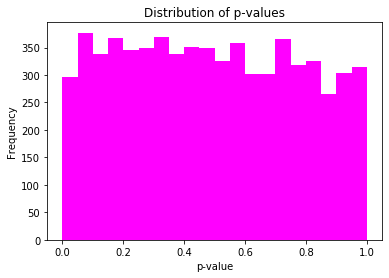

In [44]:
raw_data = gse.gpls['GPL21572'].table

signifs = []
for sig_id in signif_ids:
    signifs.append(raw_data[raw_data["ID"] == sig_id])
signifs = pd.concat(signifs)
signifs.insert(16, "P-value", f_stats.pvalue[f_stats.pvalue < alpha])

sorted_pvalues = f_stats.pvalue
sorted_pvalues.sort()

# Plotting distribution of p-values
plt.hist(sorted_pvalues, bins = 20, color = 'magenta')
plt.title('Distribution of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')

mirna_mask = signifs['Sequence Type'] == 'miRNA'
mirna_signifs = signifs[mirna_mask]


To determine if each gene is upregulated or downregulated, we compare the mean values against the control.

In [5]:
regulations = np.mean(samples, axis=-1) > np.mean(controls, axis=-1)

# True if upregulated, False if downregulated
signif_regulations = regulations[f_stats.pvalue < alpha]

labeled_sig_regs = np.stack([
    signifs['Transcript ID(Array Design)'].to_numpy(), signif_regulations], axis=-1)
labeled_sig_regs[mirna_mask]

array([['hsa-miR-215-3p', True],
       ['hsa-miR-369-5p', False],
       ['hsa-miR-429', True],
       ['hsa-miR-767-5p', False],
       ['hsa-miR-1251-5p', False],
       ['hsa-miR-1470', True],
       ['hsa-miR-3180-5p', False],
       ['hsa-miR-4286', False],
       ['hsa-miR-500b-3p', False],
       ['hsa-miR-3912-5p', True],
       ['hsa-miR-3929', True],
       ['hsa-miR-4540', True],
       ['hsa-miR-4633-3p', True],
       ['hsa-miR-4653-5p', True],
       ['hsa-miR-203b-5p', True],
       ['hsa-miR-4791', False],
       ['hsa-miR-5003-3p', False],
       ['hsa-miR-5093', False],
       ['hsa-miR-6877-5p', False],
       ['hsa-miR-7155-3p', False]], dtype=object)

In [50]:
# Creating table of p-values, regulation patterns, and functions of each miRNA of interest
data = {'P-value': signifs[mirna_mask]['P-value'].values, 
        'Regulation (case vs. control)':['Upregulated', 'Downregulated', 'Upregulated', 'Downregulated', 'Downregulated', 'Upregulated', 'Downregulated', 'Downregulated', 'Downregulated', 'Upregulated', 
                                         'Upregulated', 'Upregulated', 'Upregulated', 'Upregulated', 'Upregulated', 'Downregulated', 'Downregulated', 'Downregulated', 'Downregulated', 'Downregulated'], 
        'Function':['Tumor suppression', 'Cell proliferation', 'Tumor suppression', 'DNA methylation', 'Regulates A\u03B2', 'Cell proliferation', 'Cell proliferation', 'Cell proliferation',
                   'Tumor suppression', 'Tumor suppression', 'Lipid metabolism', 'N/A', 'N/A', 'N/A', 'Tumor suppression', 'N/A', 'N/A', 'N/A', 'N/A', 'Regulate autoimmune disease']} 

df = pd.DataFrame(data, index =['miR-215-3p', 'miR-369-5p', 'miR-429', 'miR-767-5p', 'miR-1251-5p', 'miR-1470', 'miR-3180-5p', 'miR-4286', 'miR-500b-3p', 'miR-3912-5p', 'miR-3929', 'miR-4540', 'miR-4633-3p',
                               'miR-4653-5p', 'miR-203b-5p', 'miR-4791', 'miR-5003-3p', 'miR-5093', 'miR-6877-5p', 'miR-7155-3p']) 

display(df)


,P-value,Regulation (case vs. control),Function
miR-215-3p,0.000047,Upregulated,Tumor suppression
miR-369-5p,0.000307,Downregulated,Cell proliferation
miR-429,0.000475,Upregulated,Tumor suppression
miR-767-5p,0.000475,Downregulated,DNA methylation
miR-1251-5p,0.000557,Downregulated,Regulates Aβ
miR-1470,0.000711,Upregulated,Cell proliferation
miR-3180-5p,0.000736,Downregulated,Cell proliferation
miR-4286,0.001018,Downregulated,Cell proliferation
miR-500b-3p,0.001178,Downregulated,Tumor suppression
miR-3912-5p,0.001586,Upregulated,Tumor suppression
